<a href="https://colab.research.google.com/github/Aarthi1508/yk-aws-application/blob/main/aws_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the required packages**

In [49]:
!pip install rasterio
!pip install pvlib

In [1]:
import os
import rasterio  # Import the rasterio module for reading and writing geospatial raster datasets
import numpy as np  # Import the NumPy module for numerical computing

In [2]:
!mkdir result
!mkdir img

### Load customized elevation map

1. Downlaoad Digital Eleveation Model (DEM) you interest

        - One valid source is USGS-EarthExpolorer (https://earthexplorer.usgs.gov/). Here is the tutorial link (https://www.youtube.com/watch?v=NQg0g9ObhXE)

2. Extract subarea of interest from the doloaded DSM (e.g., 400x400)

3. [Aarthi] ~~~ Shadow Simulation + web update if possible

4. Image to GIF

In [3]:
# Note
# The current directory should consists of the tif file for dsm generation and the python notebook

In [50]:
!git clone https://github.com/Aarthi1508/yk-aws-application.git
%cd yk-aws-application

### 1. Load the downloaded DSM

In [5]:
def read_geotiff(input_file):
    # Open the GeoTIFF file
    with rasterio.open(input_file, 'r') as src:
        # Read metadata
        width = src.width
        height = src.height
        count = src.count  # Number of bands
        crs = src.crs.to_epsg()  # EPSG code of the coordinate reference system
        transform = src.transform  # Affine transformation parameters

        # Read each band
        data_arrays = [src.read(band_index + 1) for band_index in range(count)]
        data_names = [src.descriptions[band_index] for band_index in range(count)]

    return {
        'width': width,
        'height': height,
        'count': count,
        'crs': crs,
        'transform': transform,
        'data_arrays': data_arrays,
        'data_names': data_names
    }

In [6]:
# Path to GeoTIFF file

# input_tif_file_path = '../n29_w096_1arc_v3.tif' # Replace with the path to your GeoTIFF file

input_tif_file_path = '../sample_400_400_sampled.tif' # Replace with the path to your GeoTIFF file

# Read GeoTIFF file
geotiff_data = read_geotiff(os.path.join(input_tif_file_path))

# Access data from geotiff_data dictionary
width = geotiff_data['width']
height = geotiff_data['height']
count = geotiff_data['count']
crs = geotiff_data['crs']
transform = geotiff_data['transform']
data_arrays = geotiff_data['data_arrays']
data_names = geotiff_data['data_names']

# Print metadata information
print(f"Width: {width}, Height: {height}, Bands: {count}")
print(f"Coordinate Reference System (CRS): EPSG:{crs}")
print(f"Affine Transformation: {transform}")

print()

# Accessing individual bands
for band_index, (data_array, data_name) in enumerate(zip(data_arrays, data_names)):
    print(f"Band {band_index + 1} - ({data_name}):")
    print(data_array.shape)

print()

# Accessing individual data arrays
output_latitude_array = data_arrays[0]
output_longitude_array = data_arrays[1]
output_sm_array = data_arrays[2]
output_dem_array = data_arrays[3]

# Rename DEM array to dsm for clarity
dsm = output_dem_array

# Replace NaN values with zeros in DSM array
dsm = np.nan_to_num(dsm, nan=0)

# Print the shape of the DSM array after replacing NaN values
print("DSM shape")
print(dsm.shape)

Width: 400, Height: 400, Bands: 4
Coordinate Reference System (CRS): EPSG:4326
Affine Transformation: | 0.00, 0.00, 0.00|
| 0.00, 0.00, 10.00|
| 0.00, 0.00, 1.00|

Band 1 - (Latitude):
(400, 400)
Band 2 - (Longitude):
(400, 400)
Band 3 - (Surface Material):
(400, 400)
Band 4 - (Elevation Map):
(400, 400)

DSM shape
(400, 400)


### 2. Extract subarea of interest from the doloaded DSM (e.g., 400x400)

In [7]:
print(type(dsm))
print("DSM shape", dsm.shape)
dsm

<class 'numpy.ndarray'>
DSM shape (400, 400)


array([[12.85603  , 11.44579  ,  8.269677 , ..., 10.50053  , 10.559221 ,
        10.613841 ],
       [ 7.4322386,  8.288061 , 13.0923   , ..., 10.386502 , 10.432499 ,
        10.473451 ],
       [12.958528 ,  6.870394 ,  7.2832317, ..., 10.294073 , 10.323208 ,
        10.345822 ],
       ...,
       [15.020295 , 15.019577 , 15.017592 , ..., 15.986183 , 15.989704 ,
        15.988179 ],
       [15.026438 , 15.024316 , 15.0215225, ..., 15.9890375, 15.995907 ,
        16.004034 ],
       [15.013906 , 15.017578 , 15.01566  , ..., 15.990748 , 15.996768 ,
        16.005796 ]], dtype=float32)

### 3. [Aarthi] ~~~ Shadow Simulation + web update if possible

In [9]:
import datetime  # Import the datetime module for working with dates and times
import pytz  # Import the pytz module for working with time zones
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module for creating static plots and visualizations
import pandas as pd  # Import the pandas module for data manipulation and analysis
from IPython.display import HTML # Import the HTML file to render the HTML page for shadow matrix

from webapp.shadowingfunction_wallheight_13 import shadowingfunction_wallheight_13 # Import the shadowing function from the shadowingfunction_wallheight_13 module
from webapp.solarposition import * # Import solarposition calculations from the solarposition module

In [10]:
import datetime
from datetime import timedelta

cdt_timezone = pytz.timezone('America/Chicago')

# Generates timestamps at 30-minutes time interval with an optional timestamp field

def generate_timestamps(timestamp = datetime.datetime.now(cdt_timezone)):
    timestamps = [timestamp + timedelta(minutes=30 * i) for i in range(1, 6)]
    return timestamps

timestamps = generate_timestamps(datetime.datetime(2024, 4, 30, 12, 0, 0))
timestamps

# timestamps = generate_timestamps() # takes the current timestamp by default if no input is provided
# timestamps

[datetime.datetime(2024, 4, 30, 12, 30),
 datetime.datetime(2024, 4, 30, 13, 0),
 datetime.datetime(2024, 4, 30, 13, 30),
 datetime.datetime(2024, 4, 30, 14, 0),
 datetime.datetime(2024, 4, 30, 14, 30)]

In [11]:
def shadow_analysis(timestamp, ind):

    print(f"Performing shadow analysis for timestamp {timestamp}   ........")

#     Display DSM plot
    f, ax = plt.subplots(dpi=500)
    plt.imshow(dsm, cmap='viridis')
    plt.title('DSM')
    plt.show()

    # Define latitude and longitude
    lon = -95.30052
    lat = 29.73463

    # Define UTC offset
    utc_offset= -6

    try:
        # Parse input timestamp and format it
        input_datetime = datetime.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
        formatted_timestamp = input_datetime.strftime('%Y-%m-%d %H:%M:%S')
#         print("\033[1mFormatted timestamp:\033[0m", formatted_timestamp)
        timestamps = [formatted_timestamp]
    except ValueError:
        print("error: Invalid input timestamp format")

    # Create a DataFrame using the timestamps as a column
    df = pd.DataFrame({'TimeStamp': timestamps})

    # Convert timestamp column to datetime
    df_solar = df.copy()
    df_solar["TimeStamp"] = df_solar["TimeStamp"].apply(pd.to_datetime)
    df_solar.set_index("TimeStamp", inplace = True)

    # Create copy for solar data
    df_solar_data = df.copy()

    # Convert timestamp column to datetime and adjust for UTC time
    df_solar_data['TimeStamp'] = pd.DatetimeIndex(df_solar_data['TimeStamp']) - pd.DateOffset(hours=utc_offset)
    df_solar_data["TimeStamp"] = df_solar_data["TimeStamp"].apply(pd.to_datetime)
    df_solar_data.set_index("TimeStamp", inplace = True)
    df_solar_data["TimeStamp"] = df_solar_data.index

    # Get solar position data
    df_solar = get_solarposition(df_solar_data.index, lat, lon)
    df_solar['TimeStamp'] = pd.DatetimeIndex(df_solar.index) + pd.DateOffset(hours=utc_offset)

    # Select relevant columns for solar data
    df_solar = df_solar[['TimeStamp', 'elevation', 'zenith', 'azimuth']]
    df_solar = df_solar.rename(columns={"elevation": "Elevation","azimuth": "Azimuth", "zenith": "Zenith"})

    # Define scale for shadow analysis
    scale = 1

    # Initialize arrays for shadows
    walls = np.zeros((dsm.shape[0], dsm.shape[1]))
    dirwalls = np.zeros((dsm.shape[0], dsm.shape[1]))

    # Define index for the specific timestamp
    i = 0

    # Get solar altitude and azimuth for the specific timestamp
    altitude = df_solar['Elevation'][i]
    azimuth = df_solar['Azimuth'][i]

    # Get hour and minute for the specific timestamp
    hour = df_solar.index[i].hour
    minute = df_solar.index[i].minute

    # Perform shadow analysis
    sh, wallsh, wallsun, facesh, facesun = shadowingfunction_wallheight_13(dsm, azimuth, altitude, scale, walls, dirwalls * np.pi / 180.)

    # Convert shadow data to DataFrame
    shadow_df = pd.DataFrame(sh)
    shadow_df.columns = [str(column) for column in shadow_df.columns]
    dataframe_dict = shadow_df.to_dict(orient="records")
    
    shadow_matrix_lst = dataframe_dict

    # Extract year, month, day, hour, minute, and second from the item_id field
    year = str((str(timestamp.split()[0])).split('-')[0])
    month = str((str(timestamp.split()[0])).split('-')[1])
    day = str((str(timestamp.split()[0])).split('-')[2])
    hour = str((str(timestamp.split()[1])).split(':')[0])
    minute = str((str(timestamp.split()[1])).split(':')[1])
    second = str((str(timestamp.split()[1])).split(':')[2])

    # Initialize an empty list to store the values
    values_list = []

    # Iterate over each entry in the list
    for entry in shadow_matrix_lst:
        # Extract the values from the dictionary and append them to the values list
        values_list.append(list(entry.values()))

    # Convert the values list into a NumPy array
    shadow_matrix = np.array(values_list)

    # Print the shape of the array
#     print("Shape of the shadow_matrix array:", shadow_matrix.shape)

    # Create a plot to visualize the shadow matrix
    f, ax = plt.subplots(dpi=500)
    plt.imshow(shadow_matrix, cmap='viridis')

    plot_title = str(year) + "-%2s"% str(month).zfill(2) + "-%2s"% str(day).zfill(2) + " %2s" % str(hour).zfill(2) + ":%2s"% str(minute).zfill(2) + ":%2s"% str(second).zfill(2)
    plt.title(plot_title, pad =10, fontsize=10, color="black", weight='bold' )

    fig_name = str(year) + "-%2s"% str(month).zfill(2) + "-%2s"% str(day).zfill(2) + " %2s" % str(hour).zfill(2) + ":%2s"% str(minute).zfill(2) + ":%2s"% str(second).zfill(2)

    fig_save_path = f'../img/{fig_name}'
    plt.savefig(fig_save_path)
    return fig_name

Performing shadow analysis for timestamp 2024-04-30 12:30:00   ........


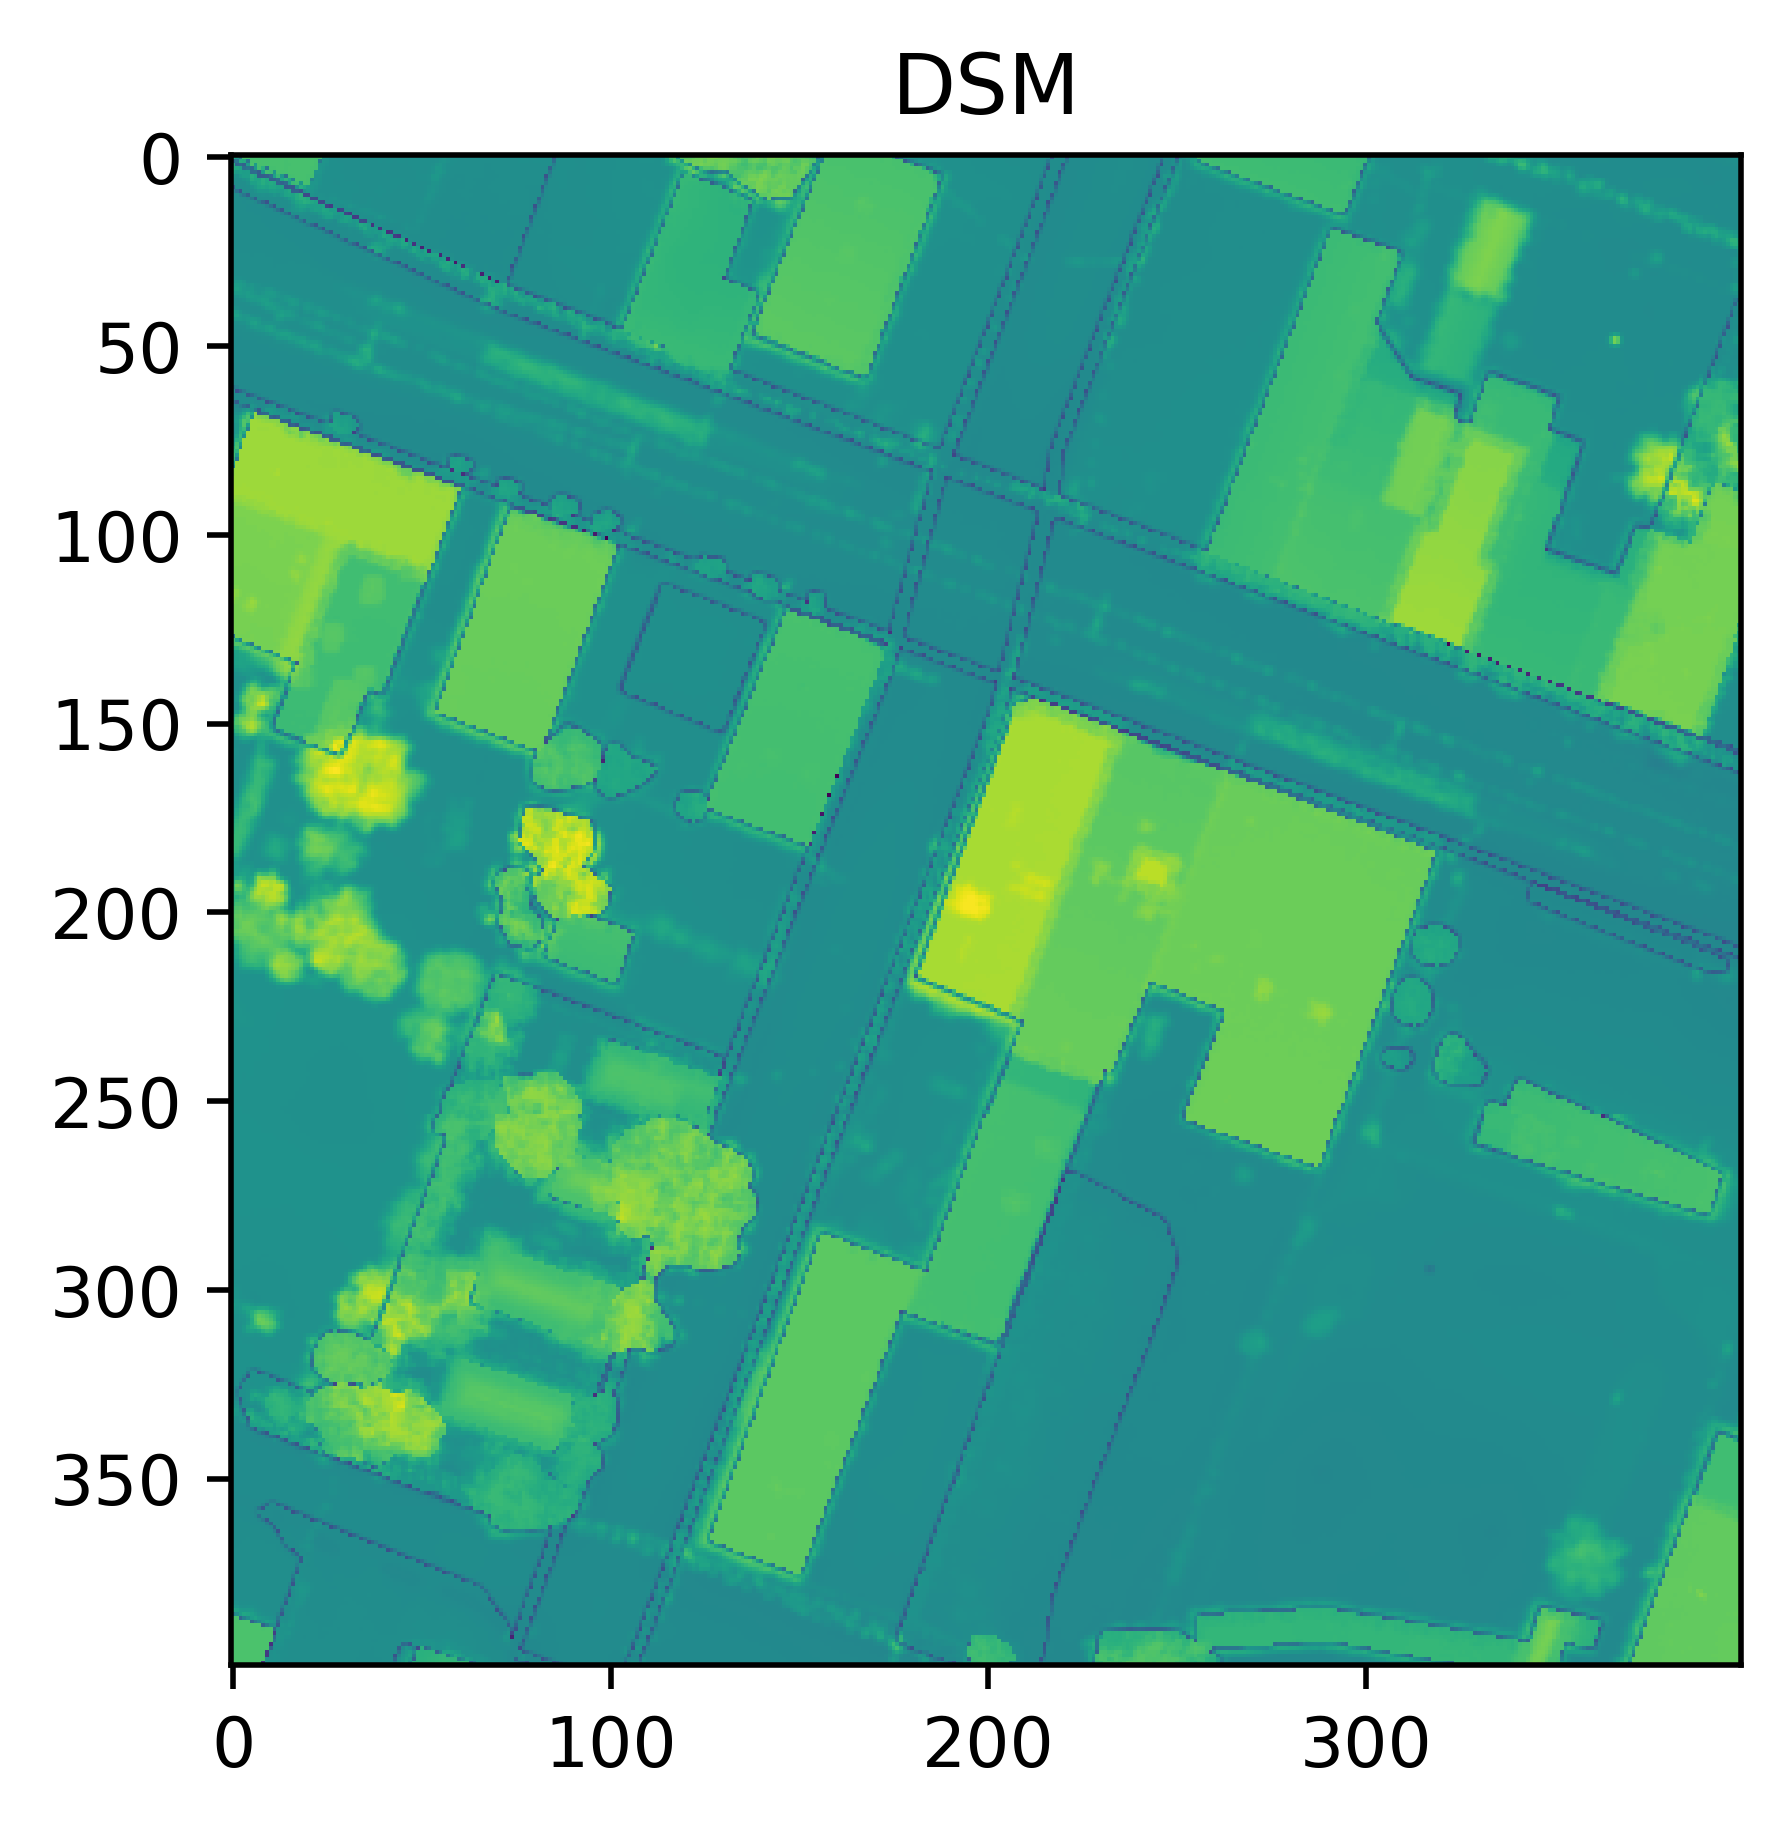

Performing shadow analysis for timestamp 2024-04-30 13:00:00   ........


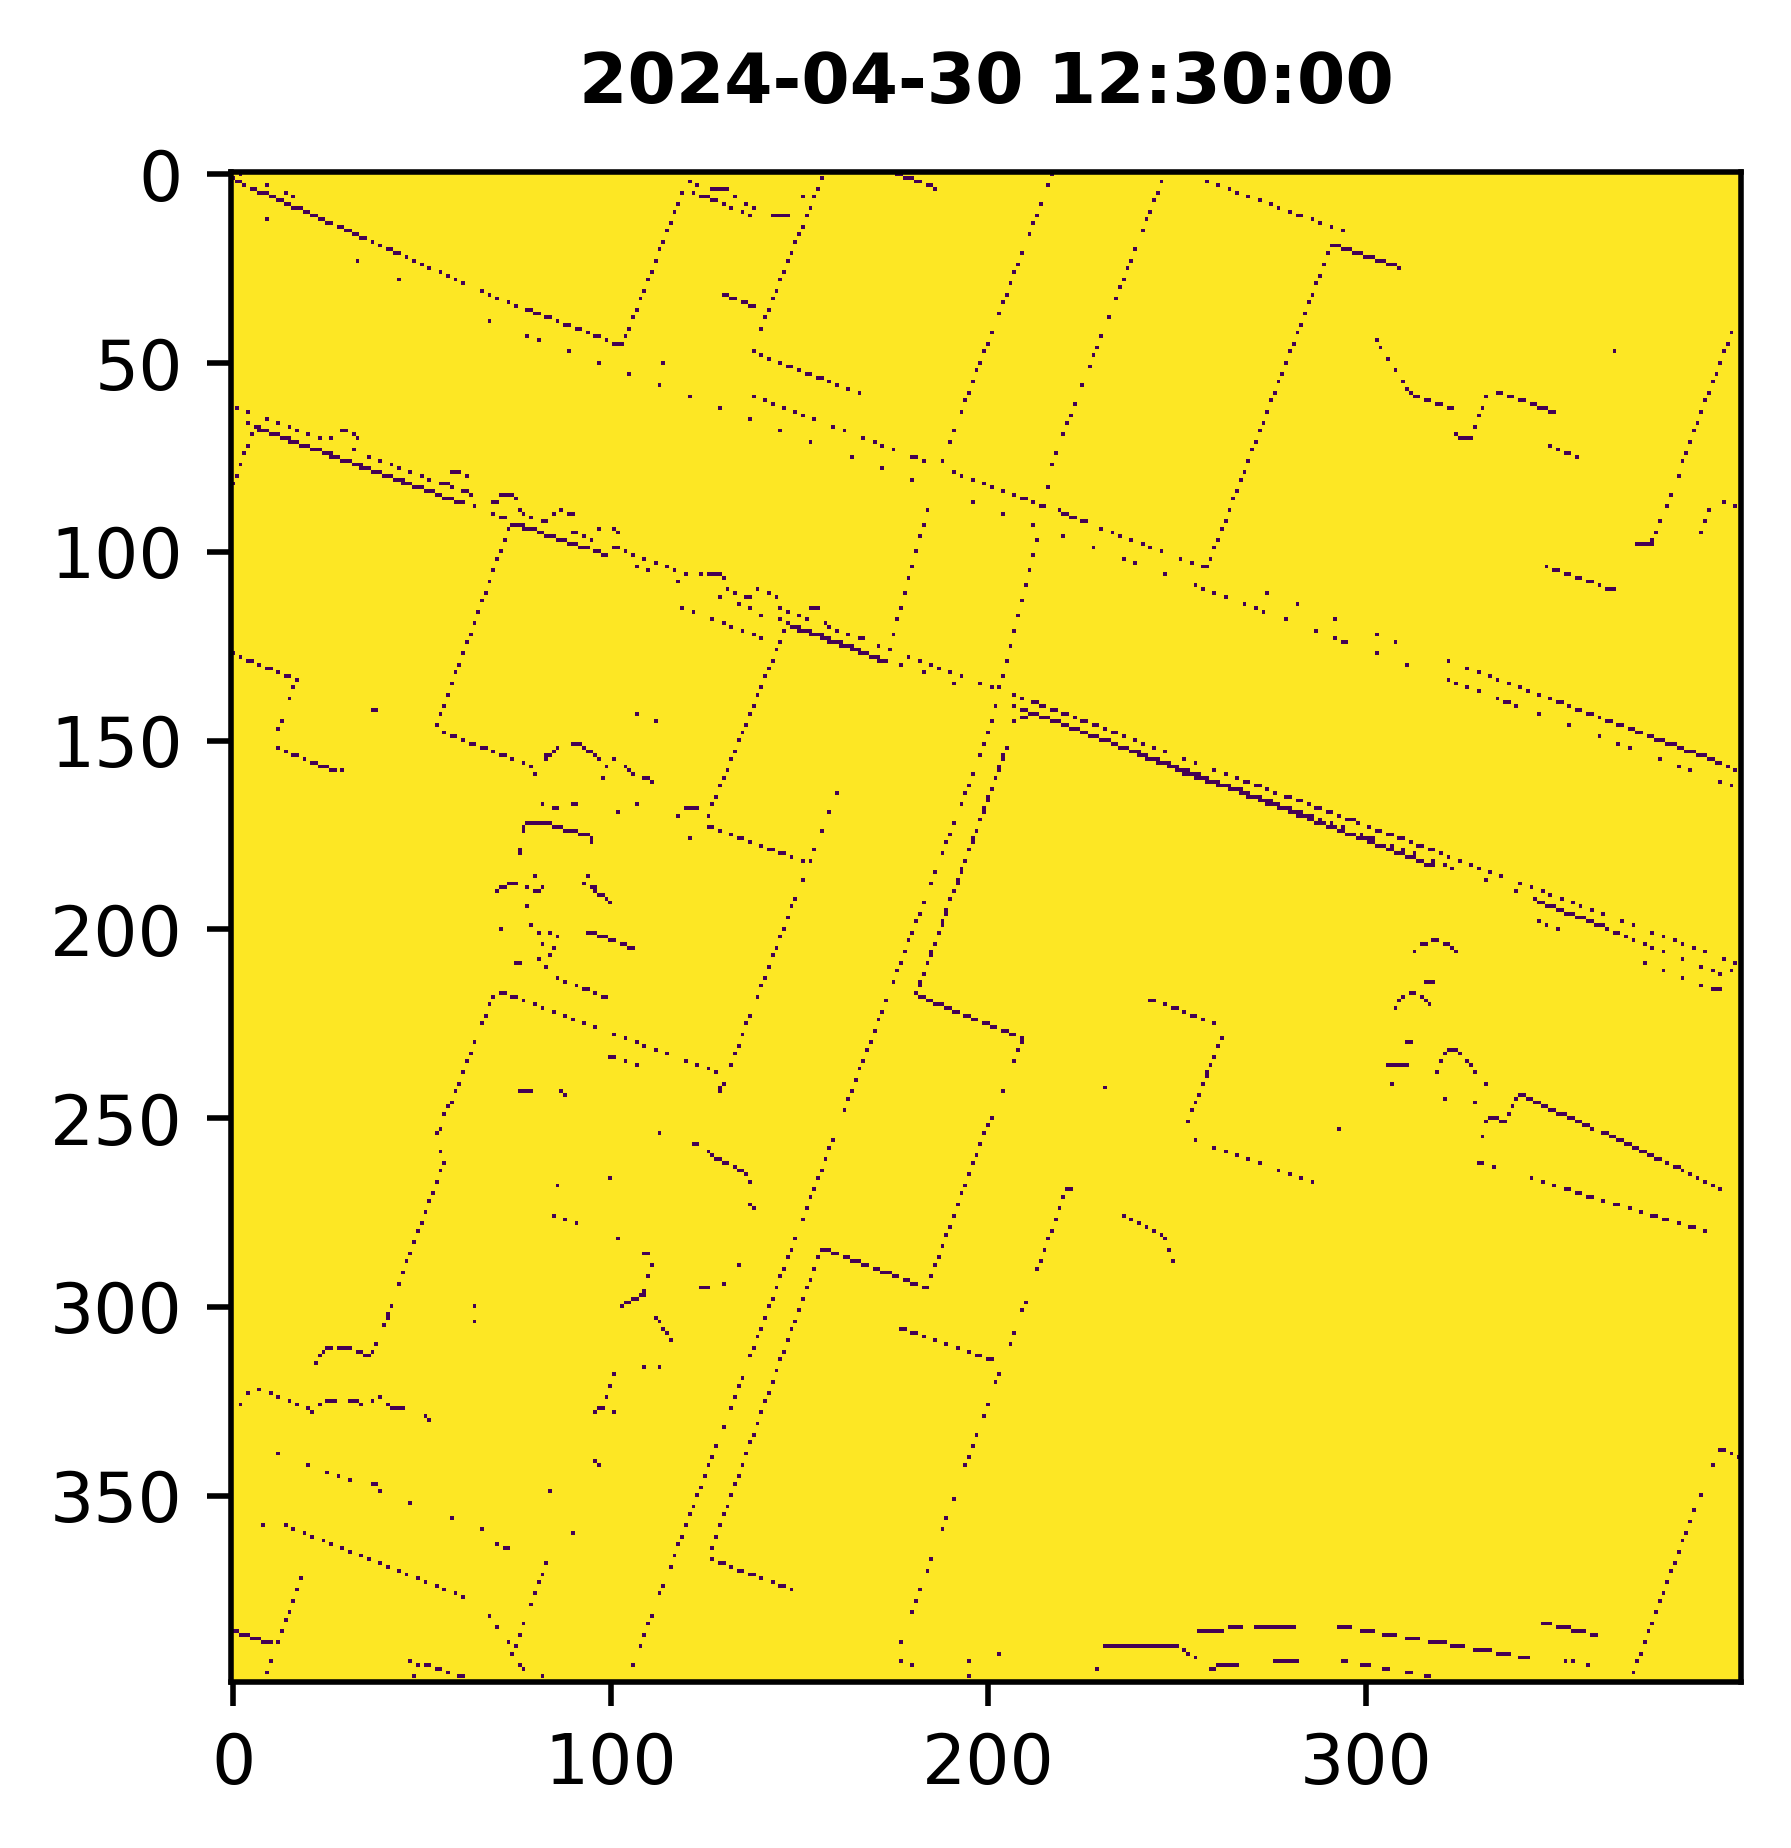

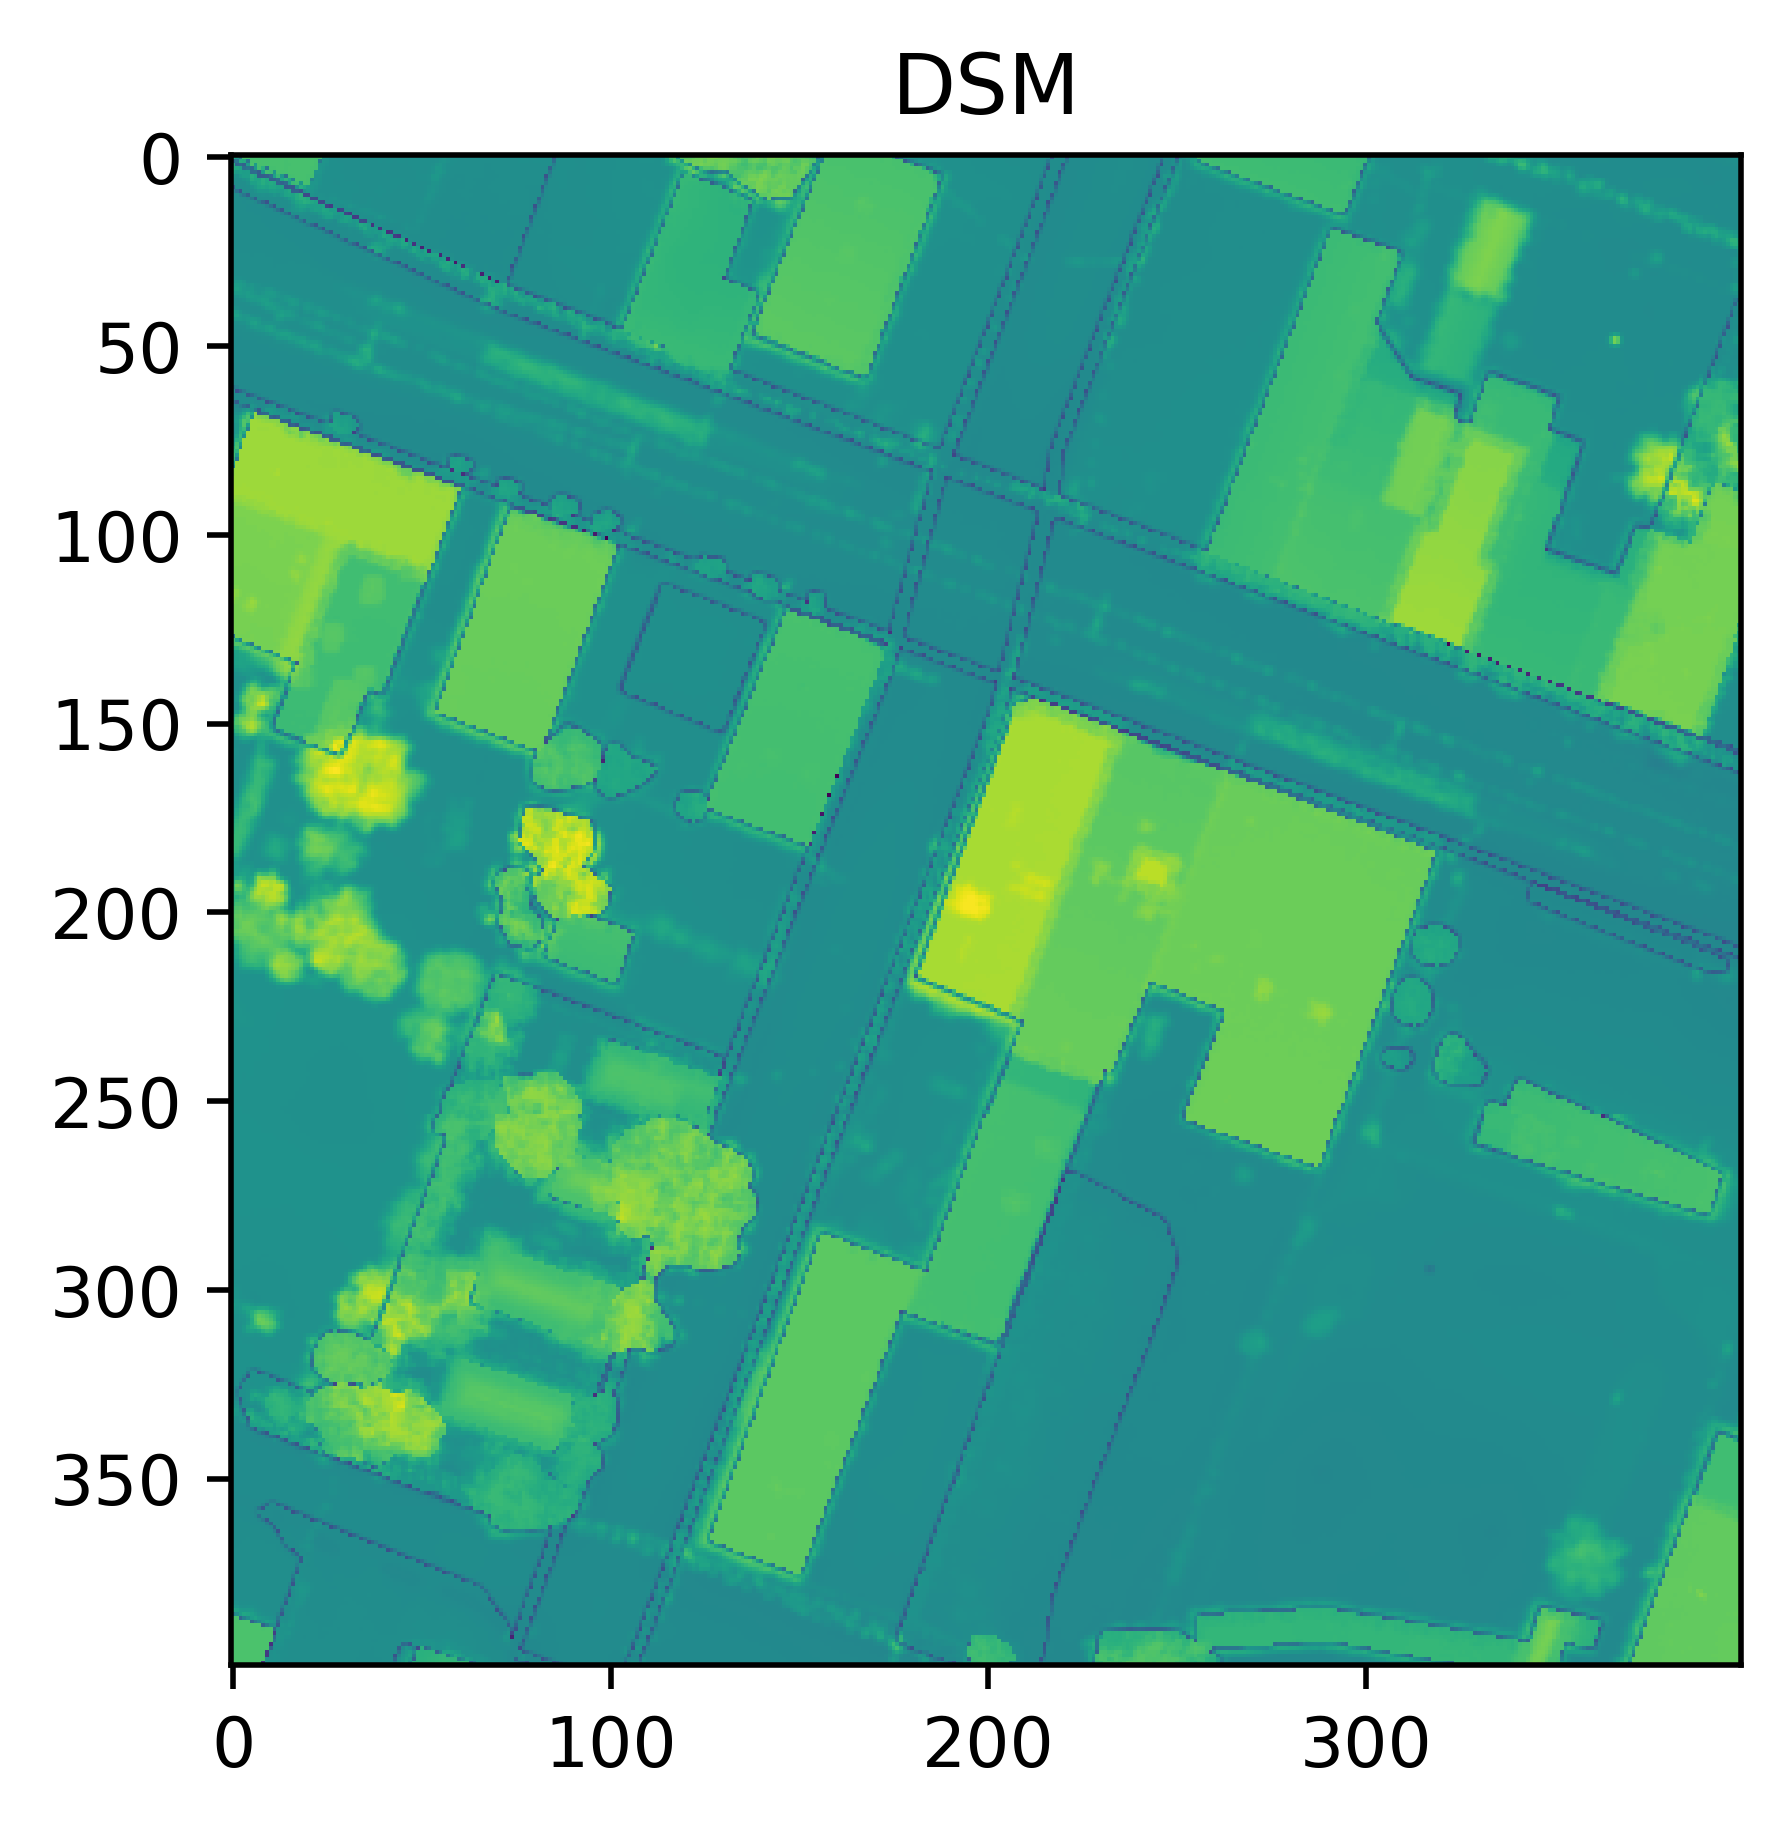

Performing shadow analysis for timestamp 2024-04-30 13:30:00   ........


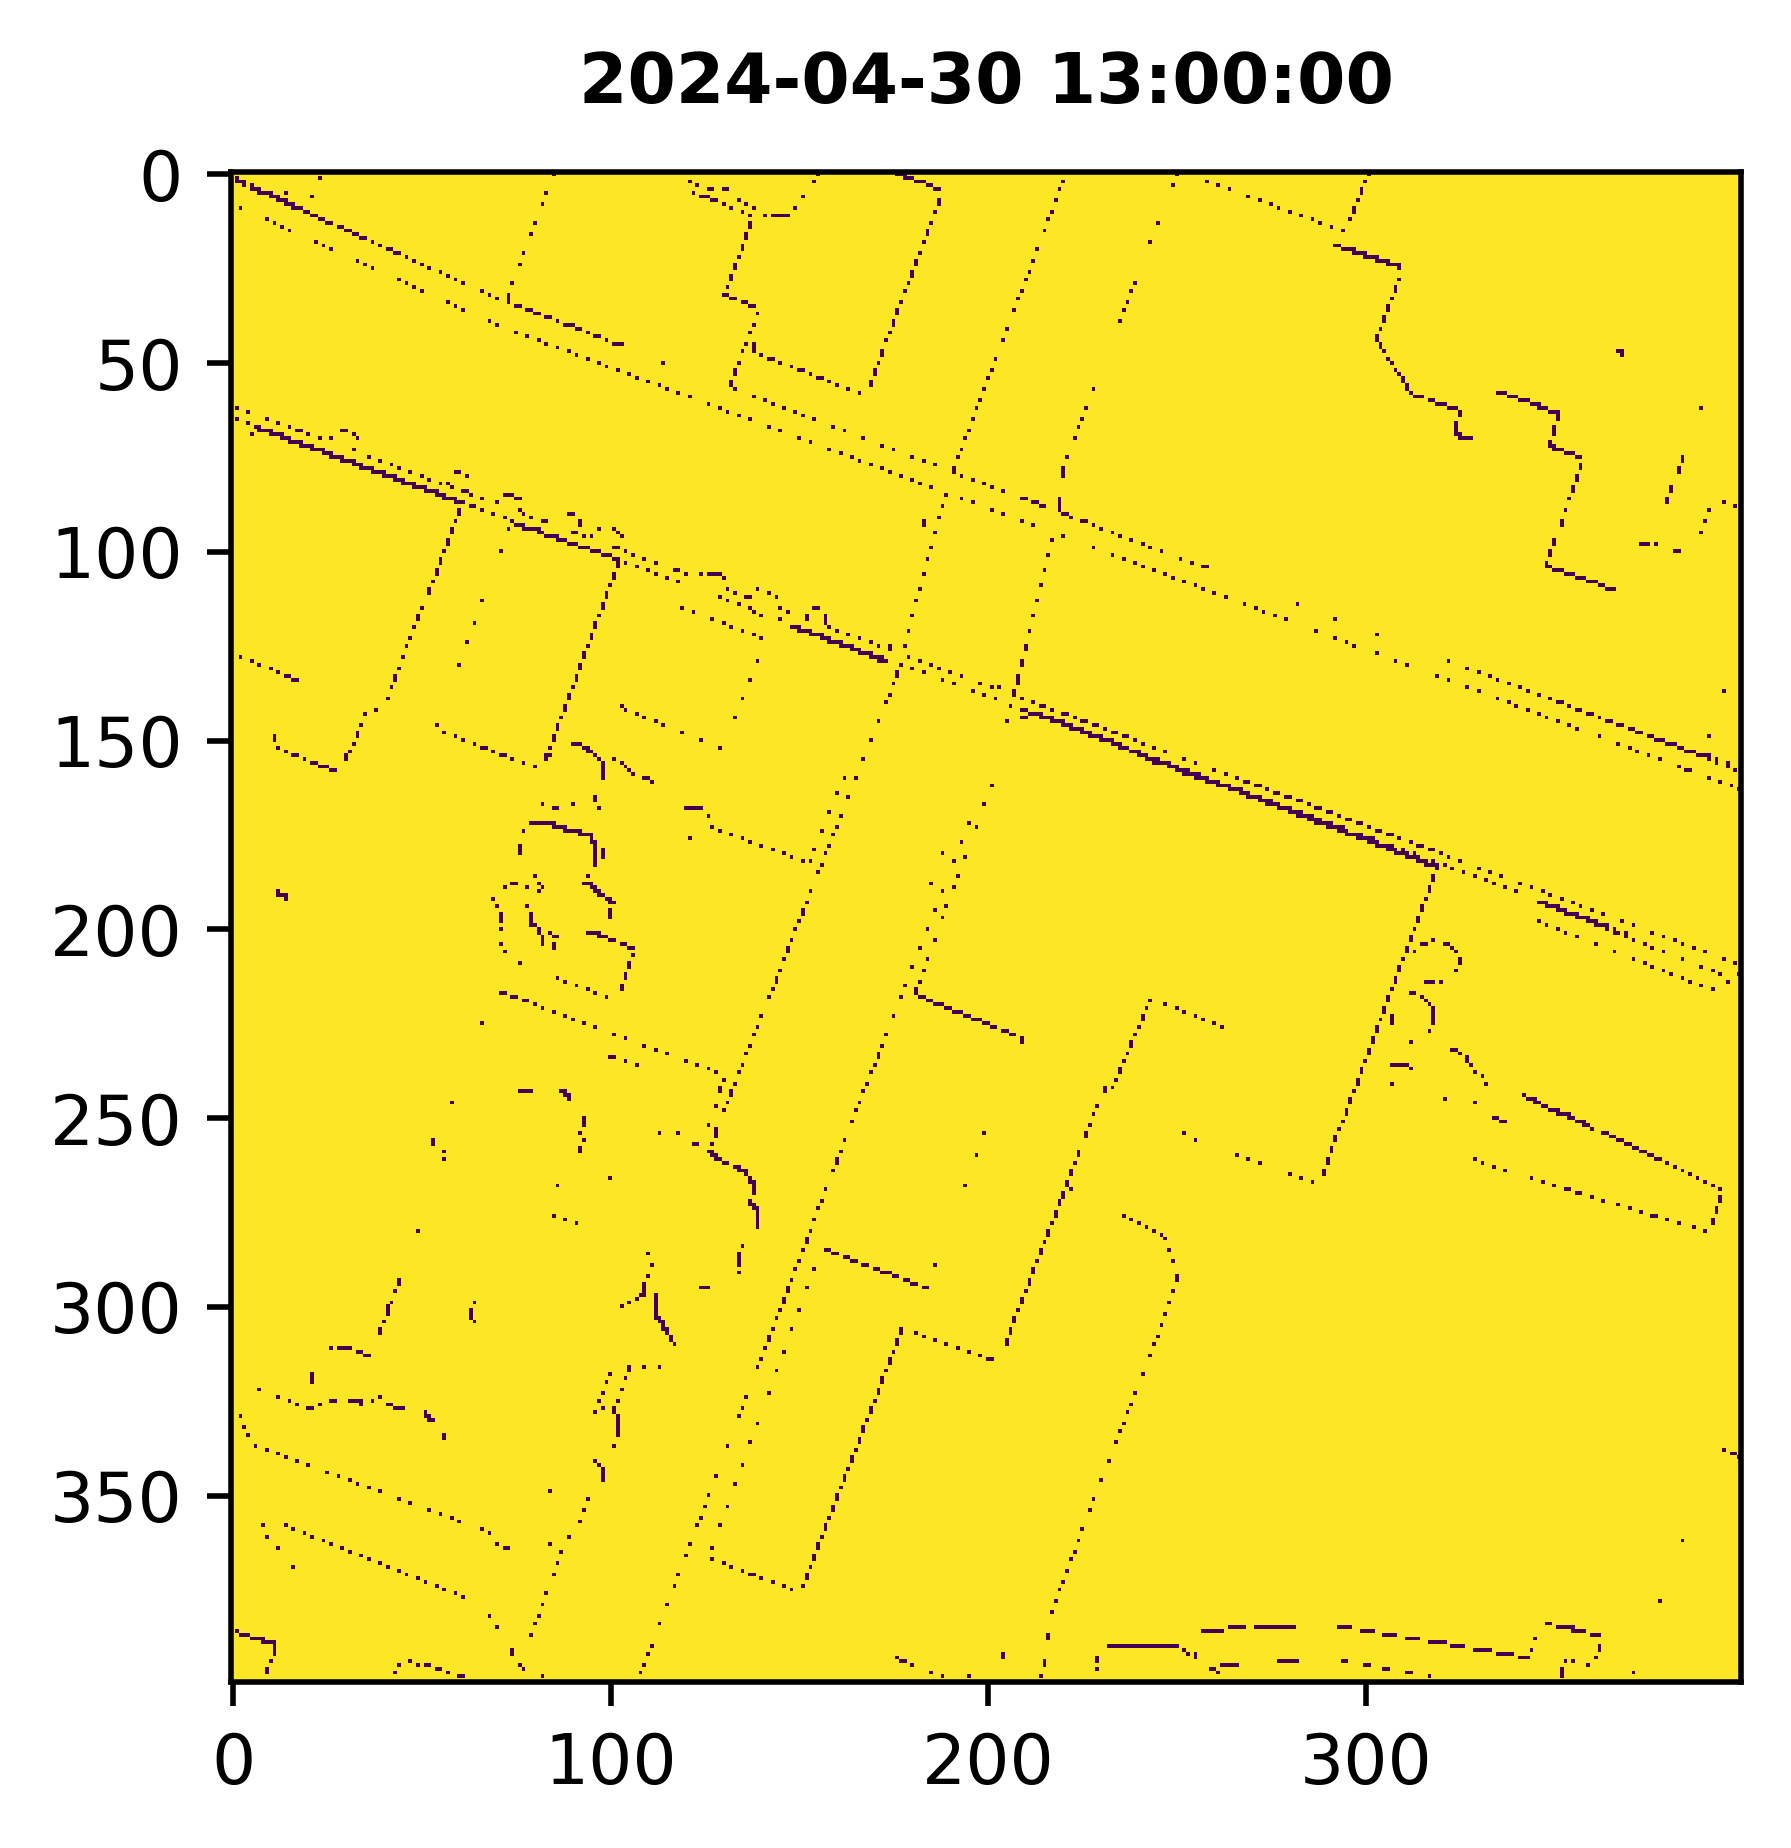

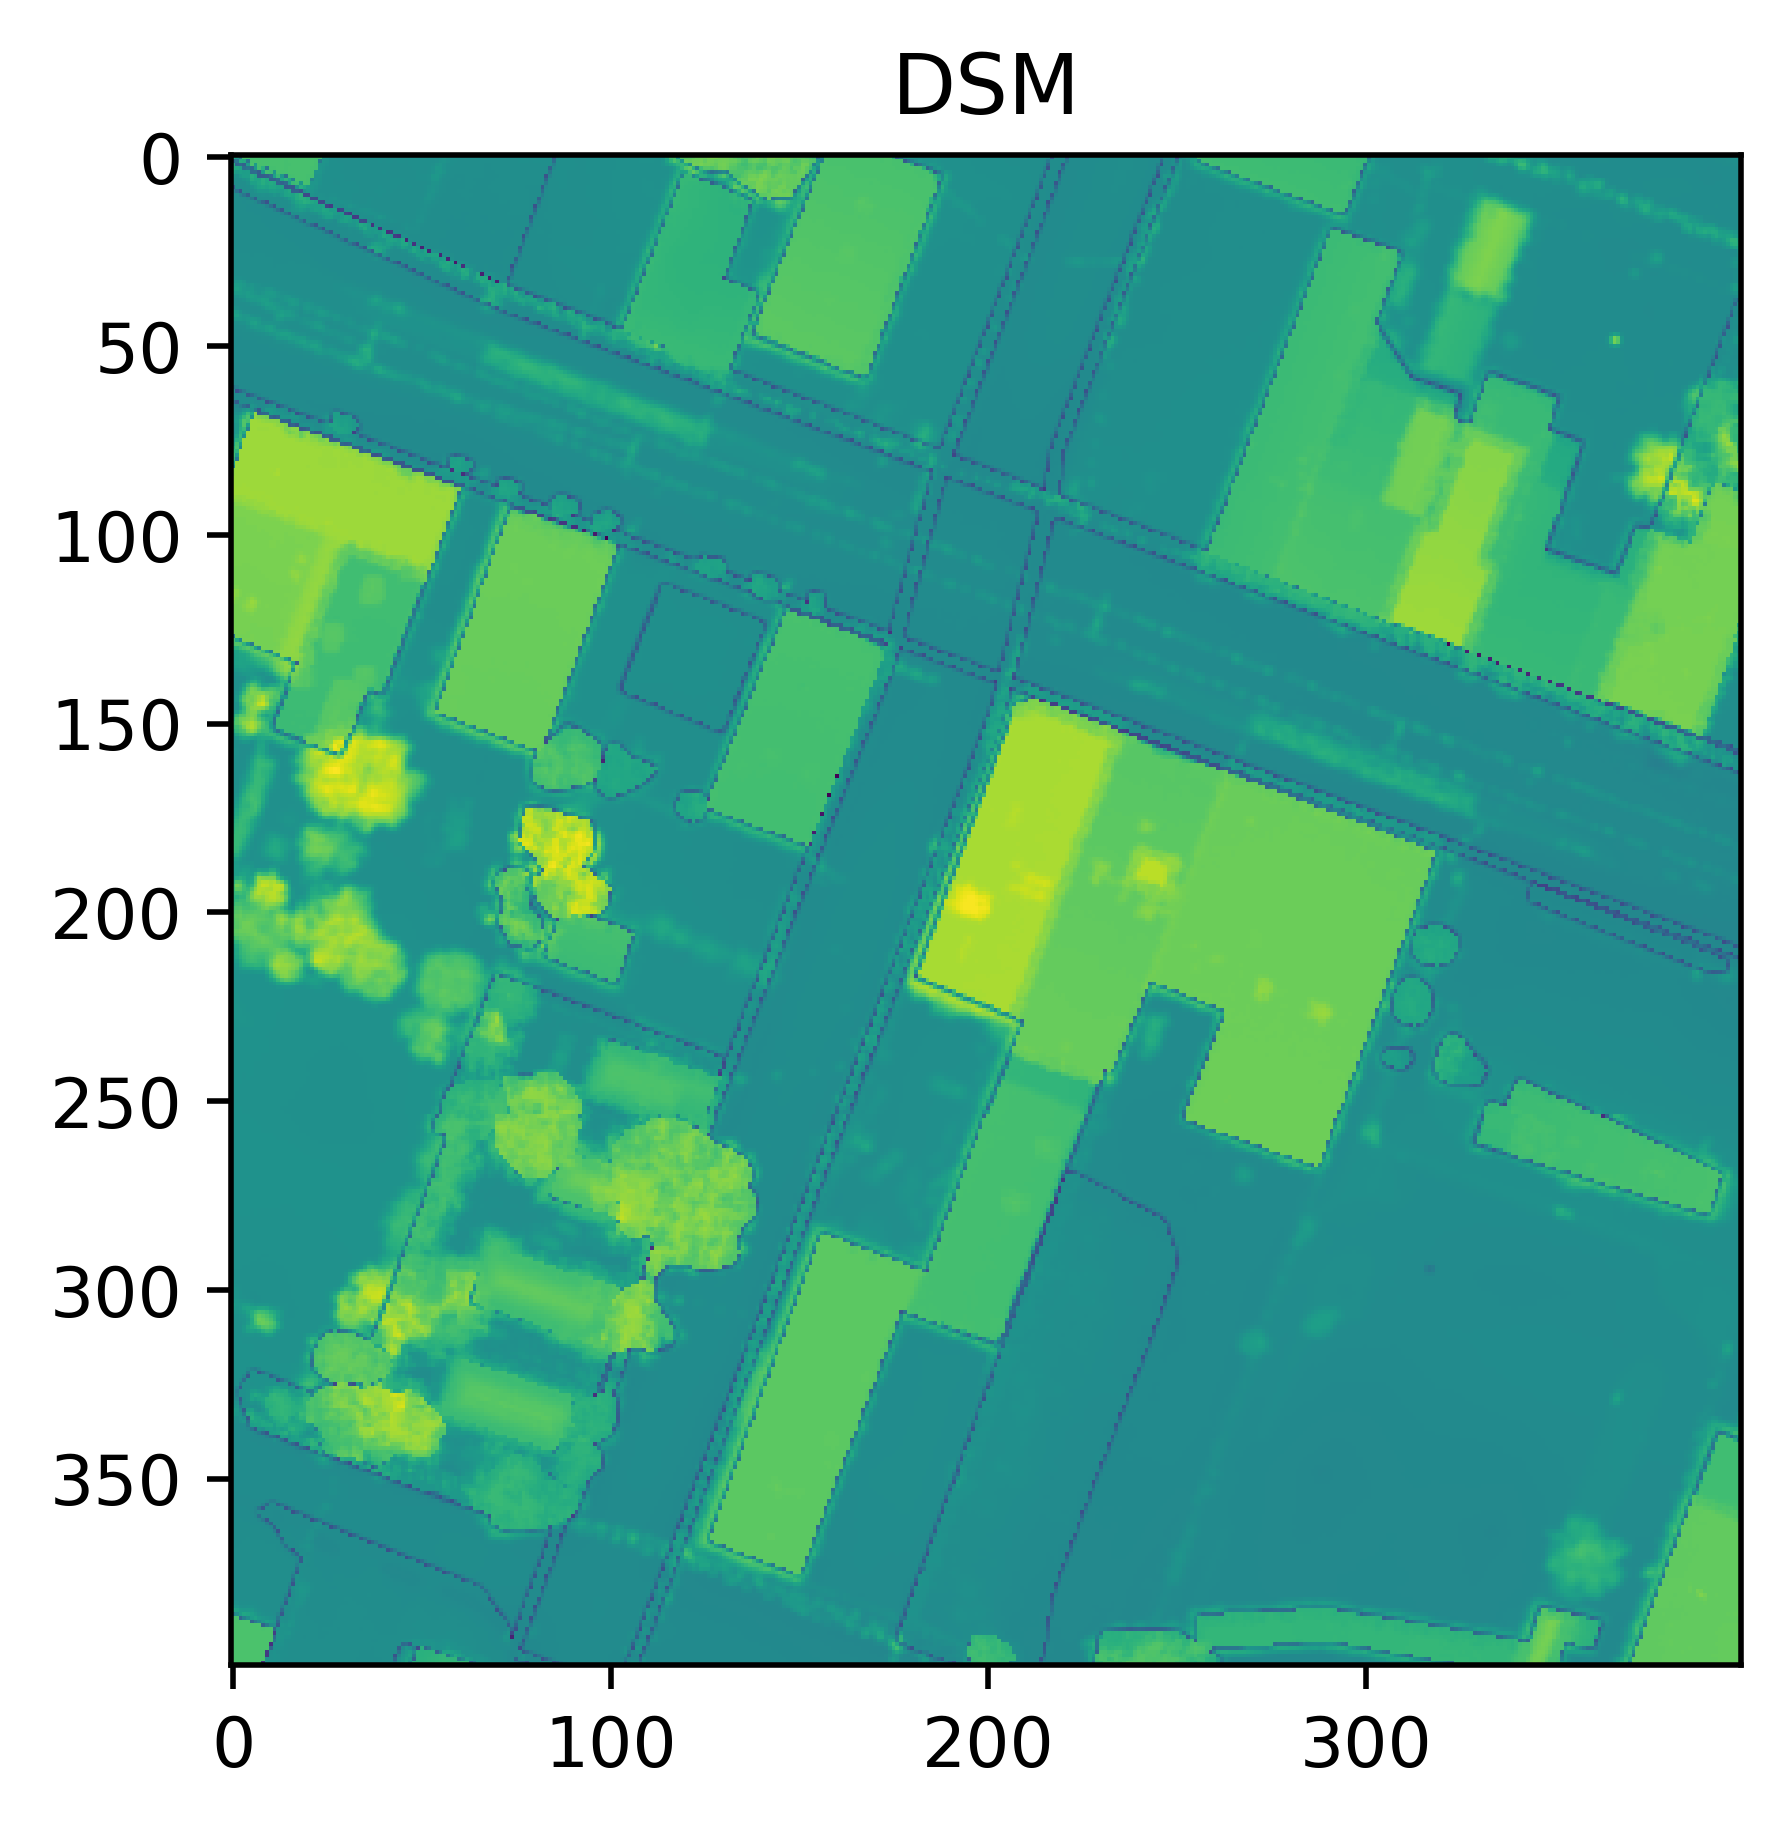

Performing shadow analysis for timestamp 2024-04-30 14:00:00   ........


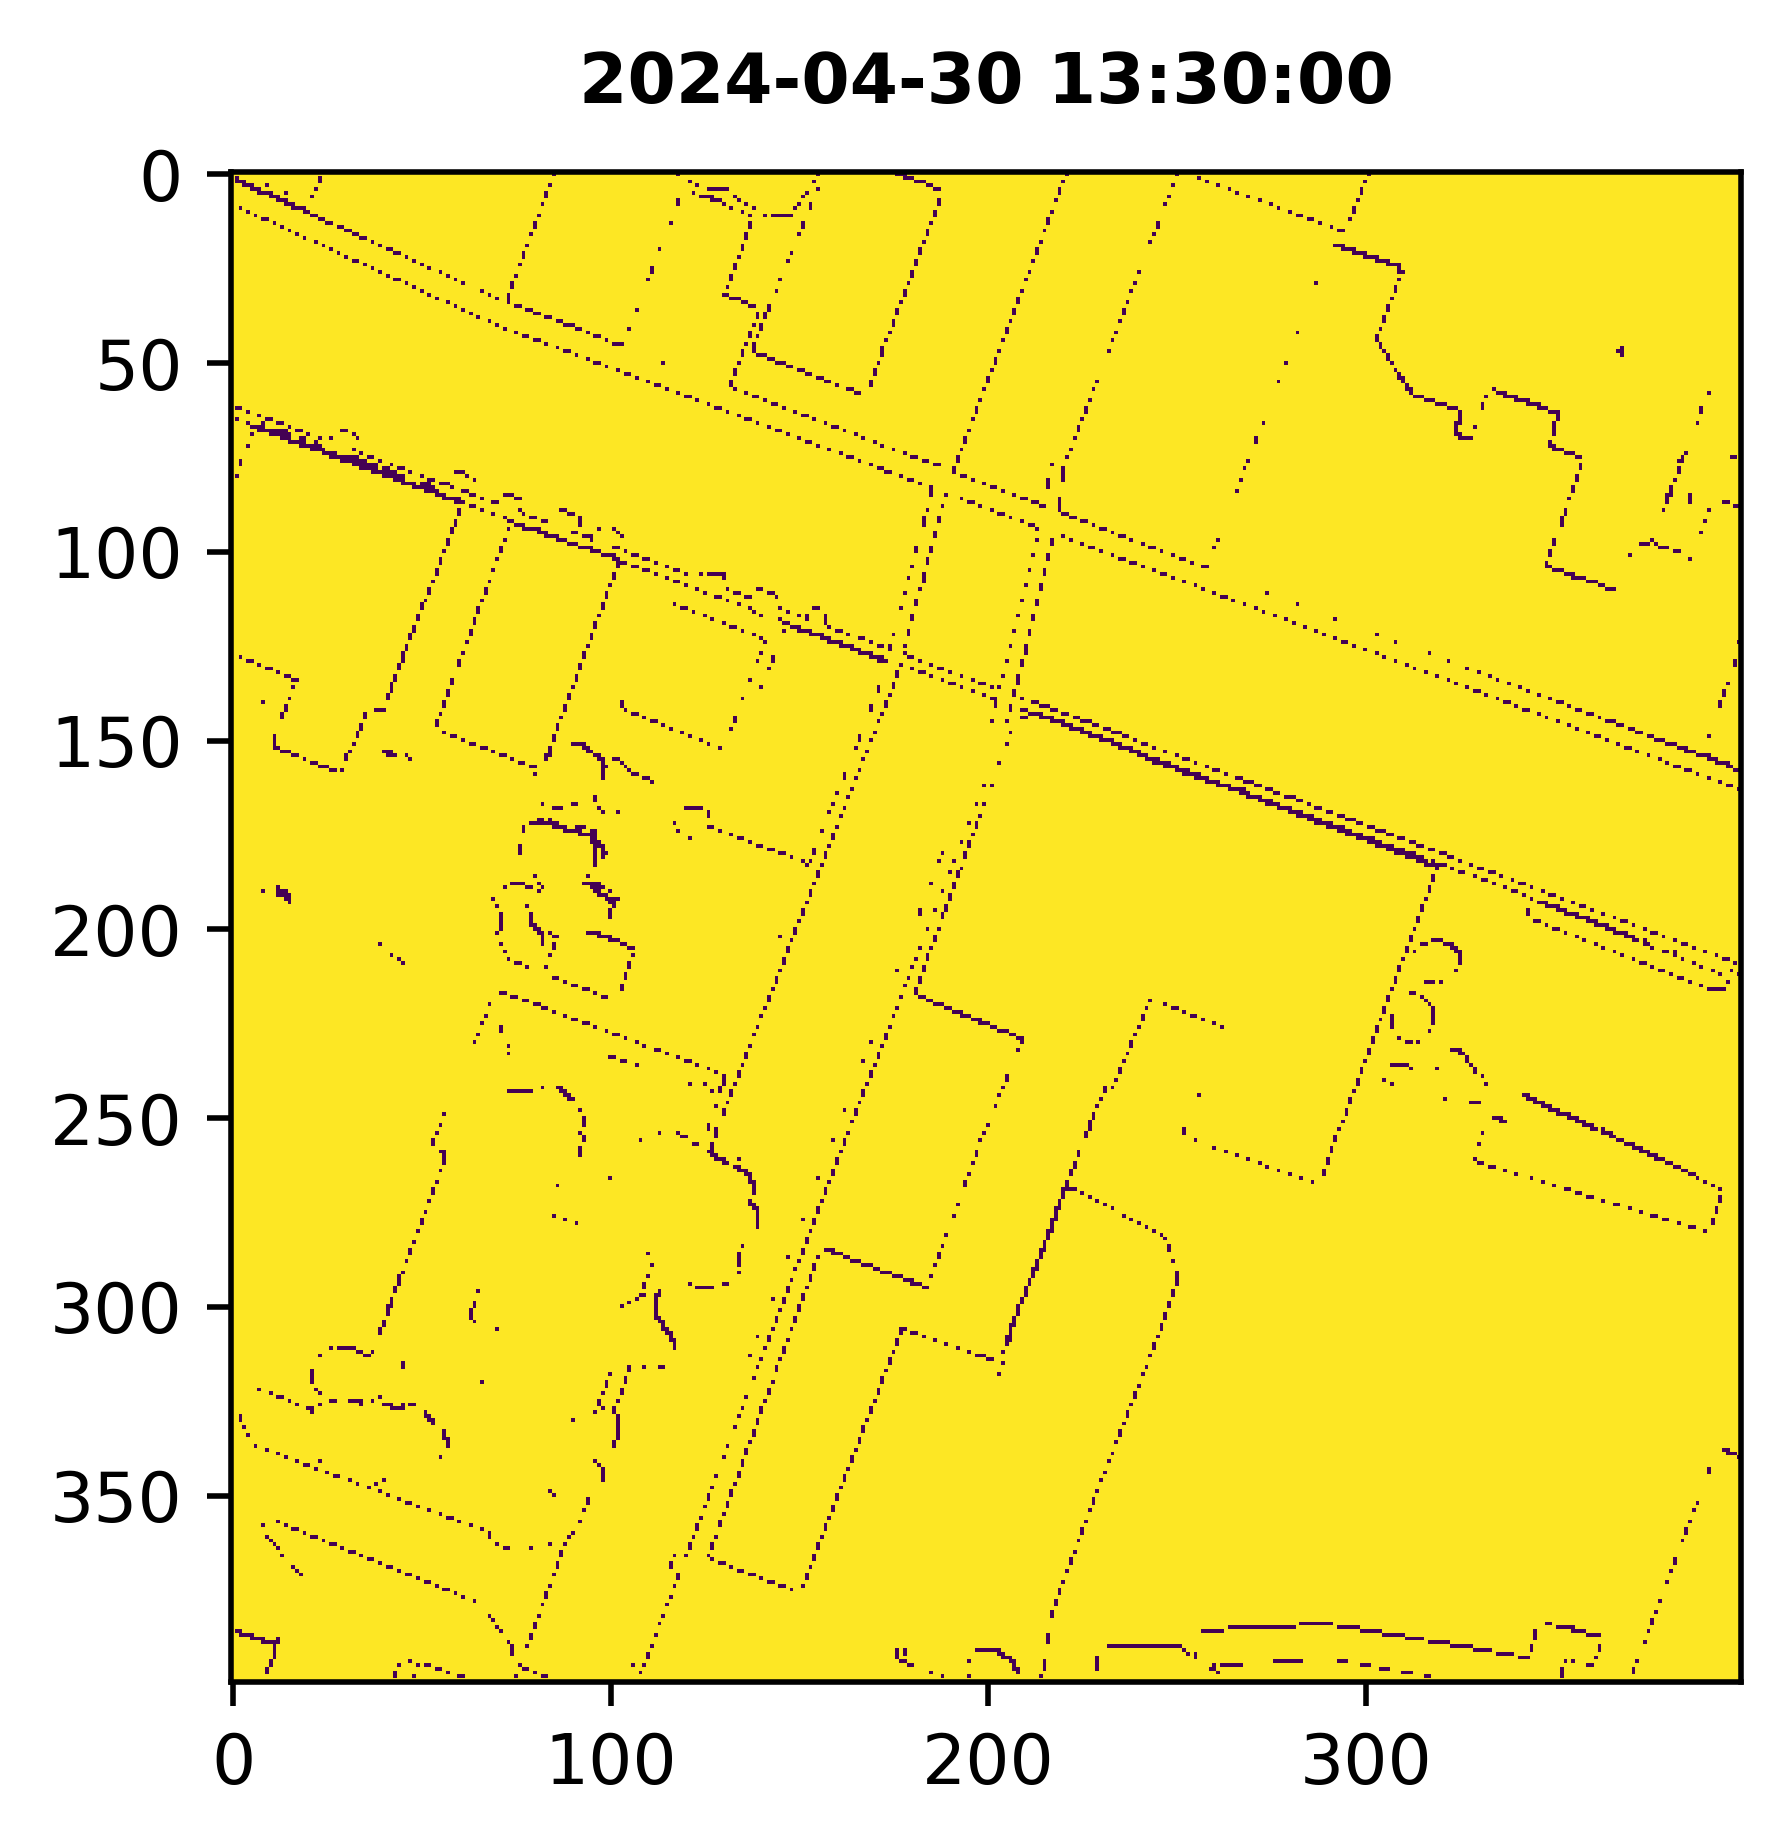

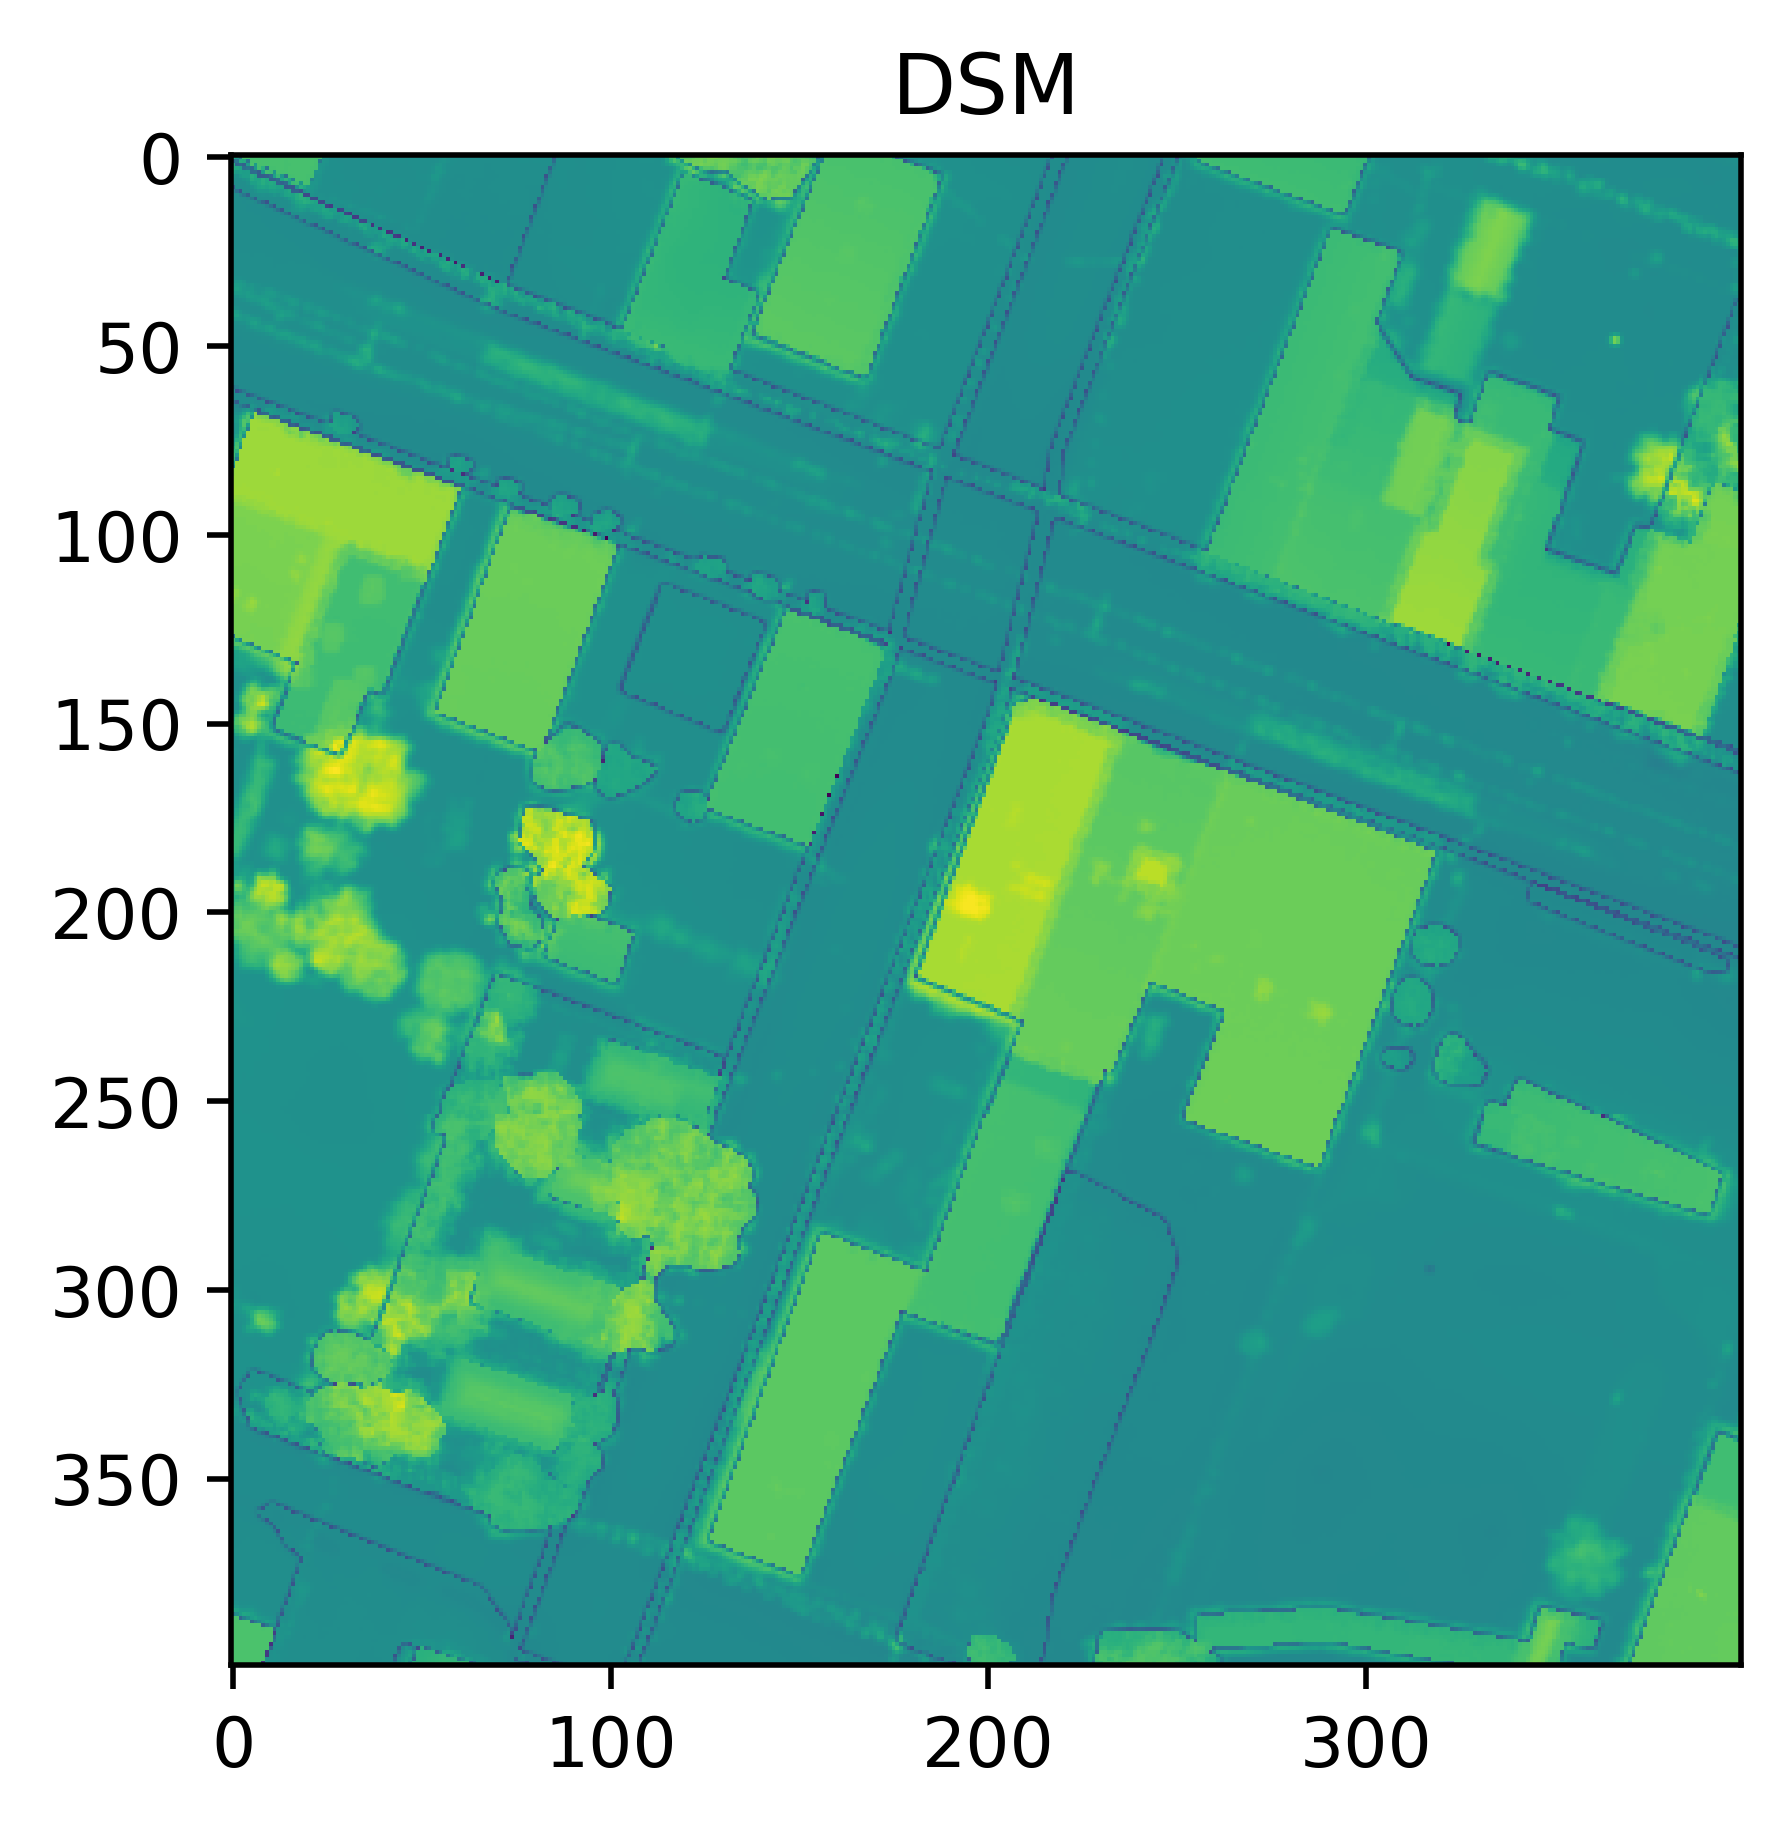

Performing shadow analysis for timestamp 2024-04-30 14:30:00   ........


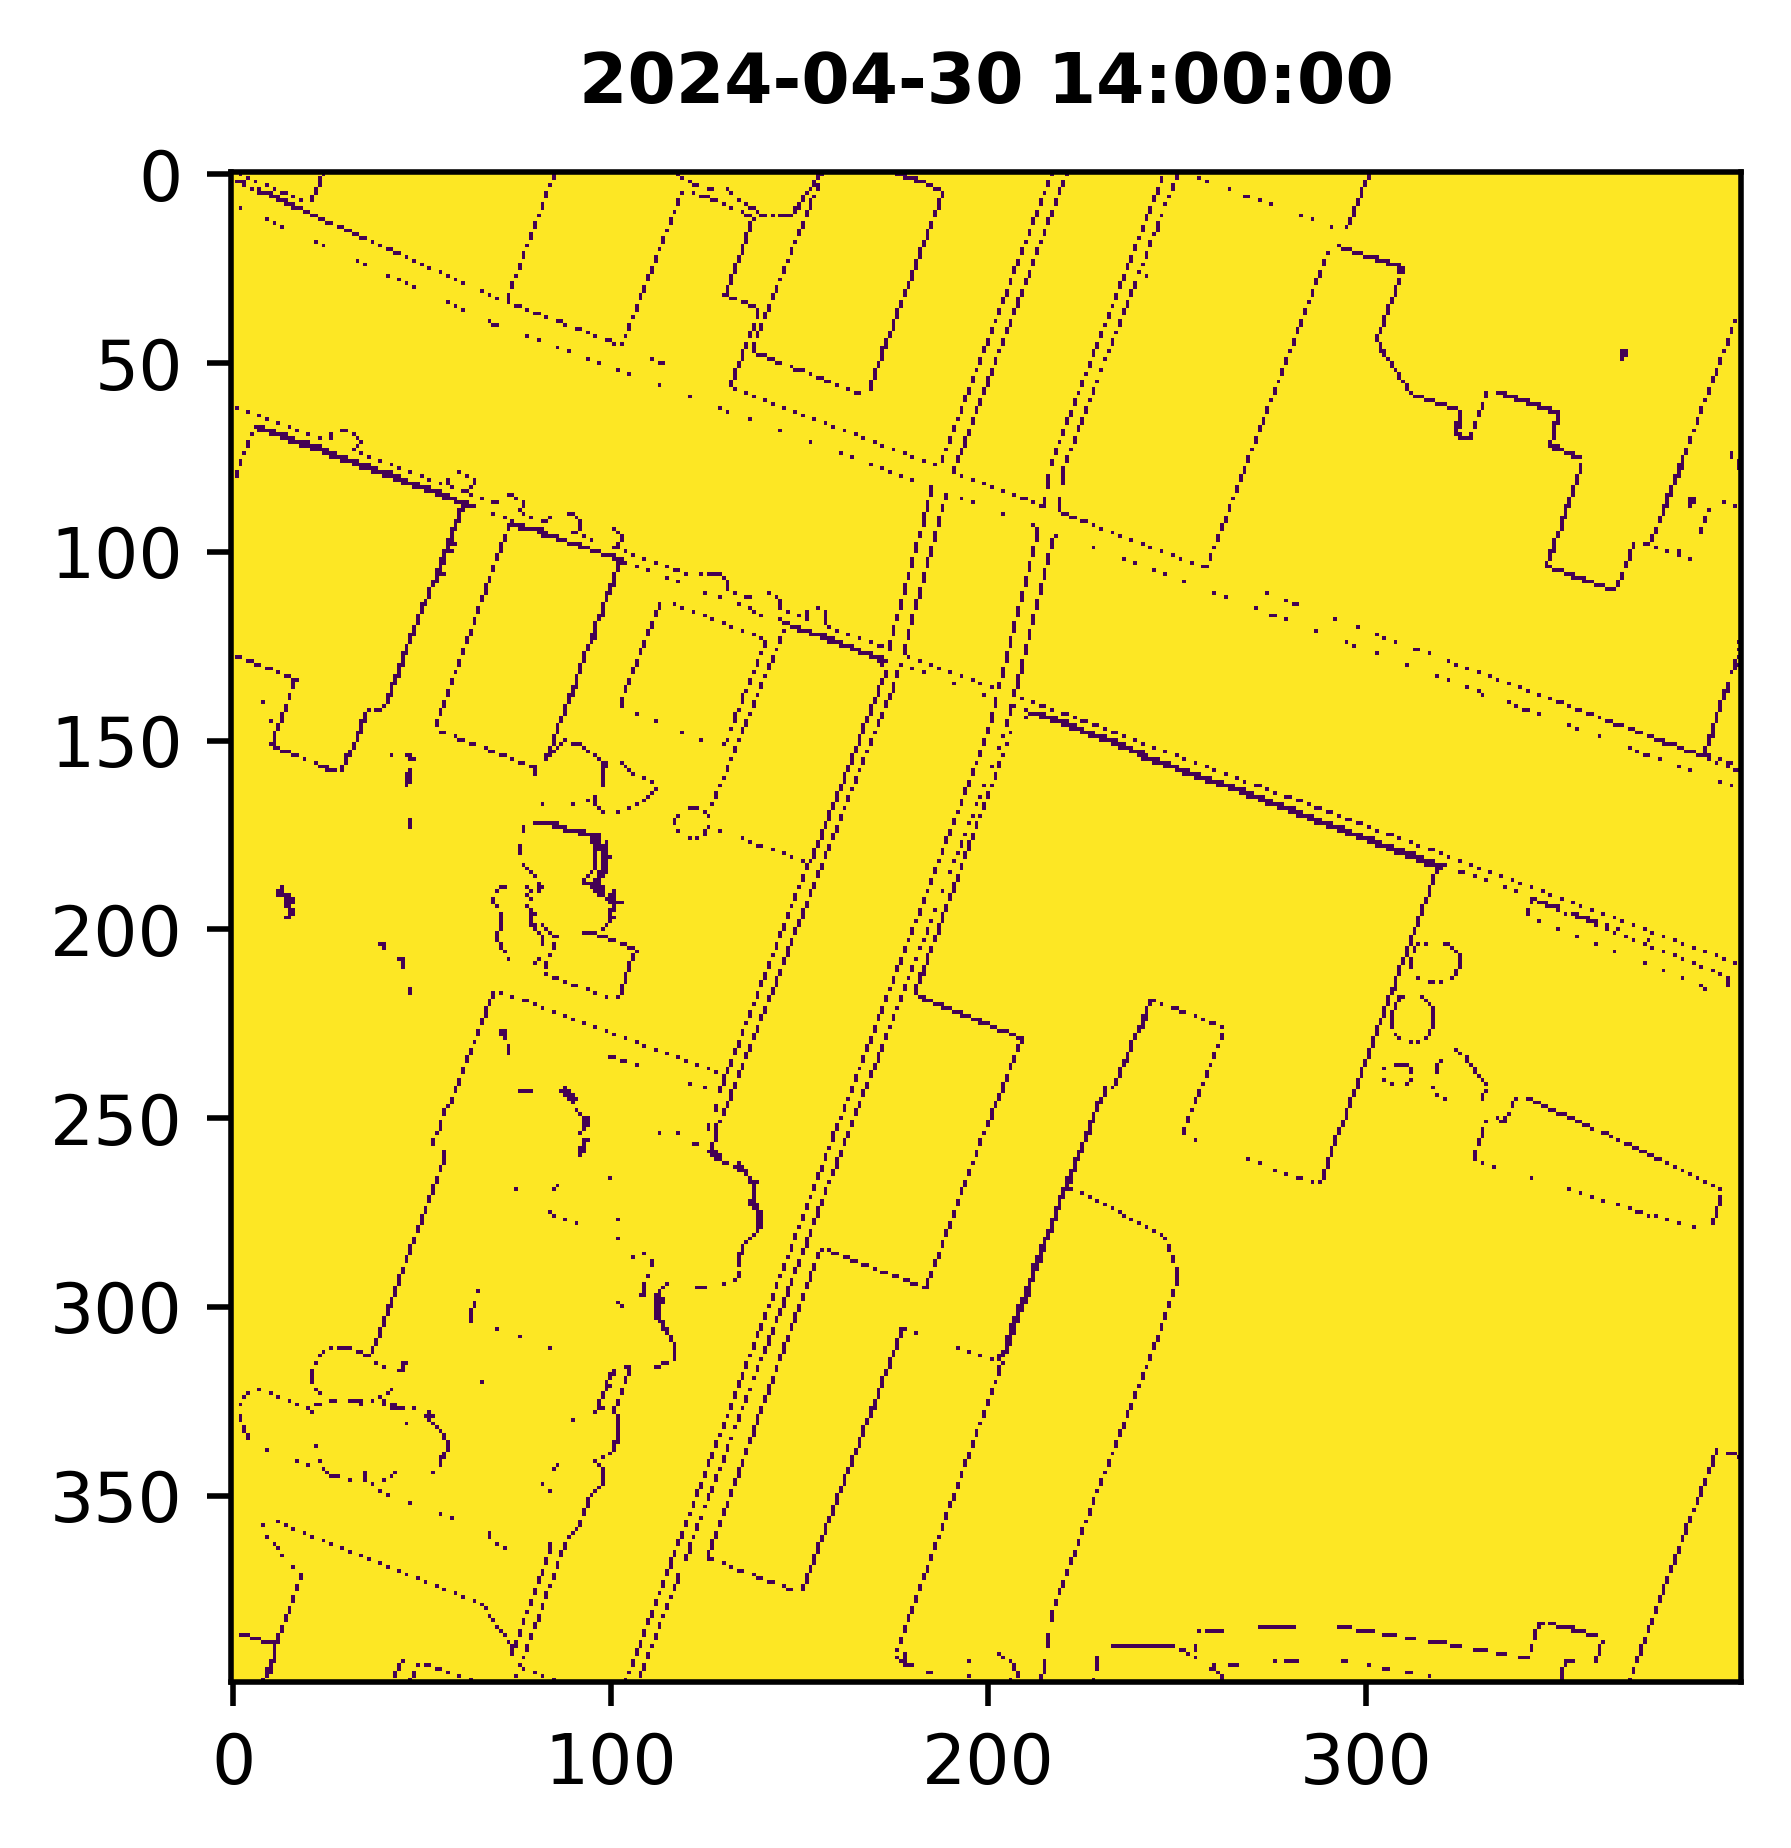

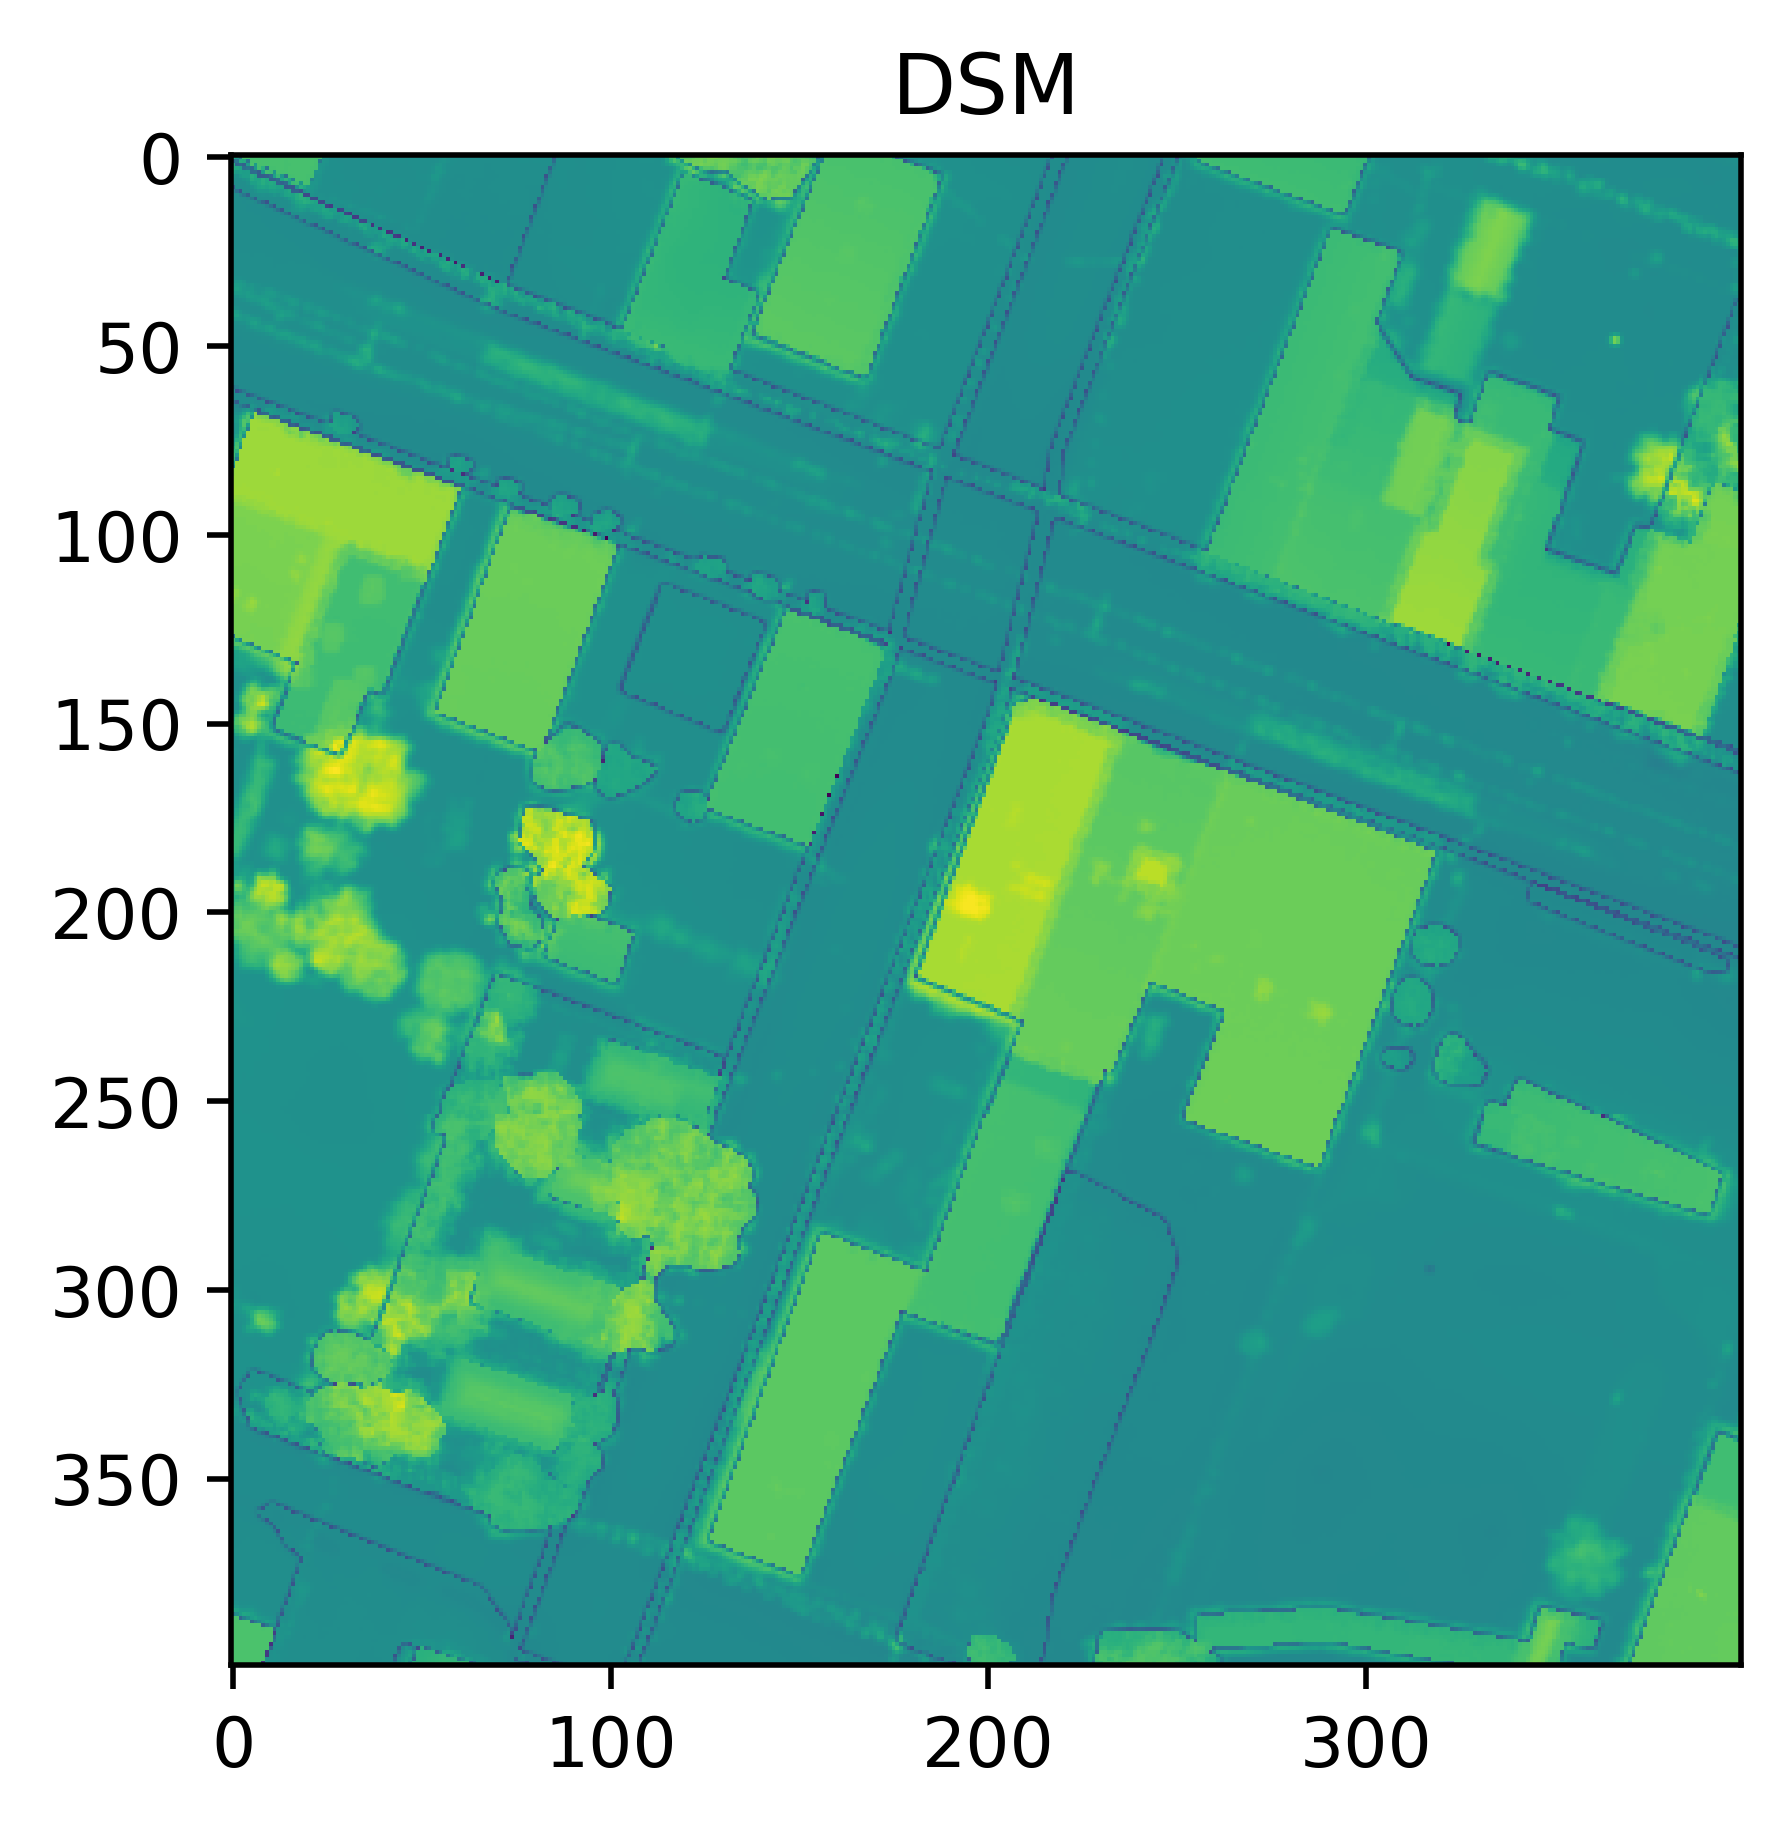

'2024-04-30 14:30:00'

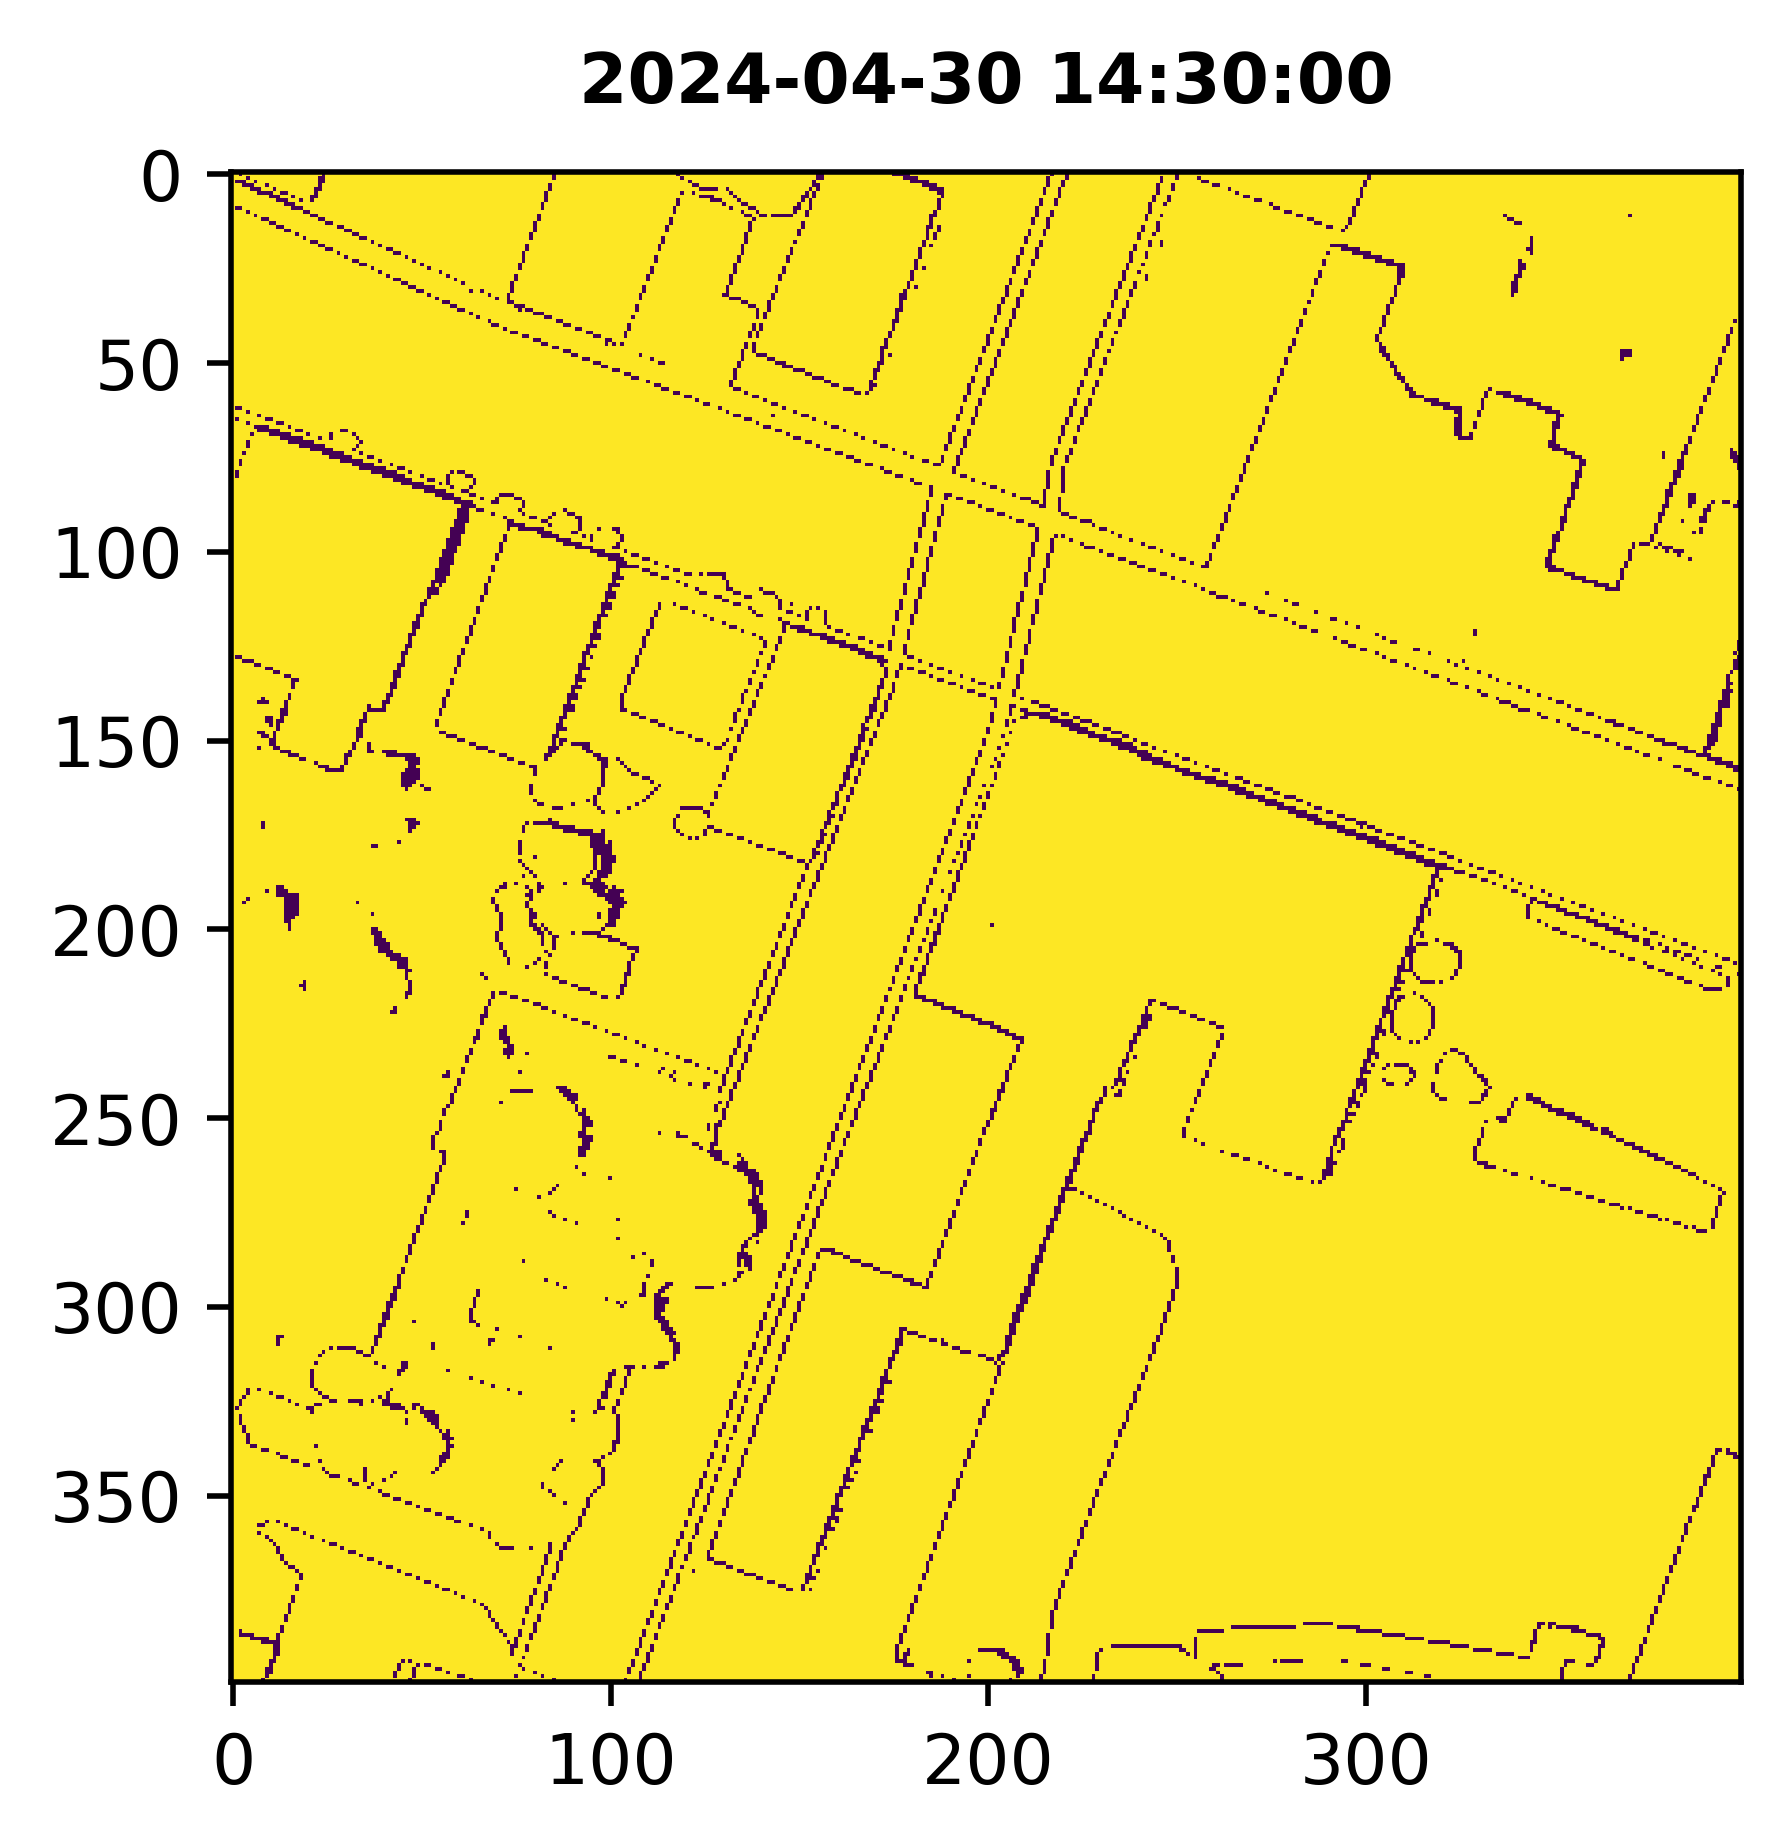

In [12]:
for ind, ts in enumerate(timestamps):
    fig_name = shadow_analysis(ts.strftime('%Y-%m-%d %H:%M:%S'), ind)
fig_name

In [13]:
# Move back to the main directory
cd ..

/home/skybluego/Documents/Aarthi/Yoojun/AWS-Assignment


In [43]:
def generate_html(image_filename):
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Shadow Matrix</title>
        <style>
            body {{
                margin: 0;
                padding: 0;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh; /* Full height of the viewport */
                background-color: #f0f0f0; /* Optional: Set background color */
            }}

            .container {{
                width: 80%; /* Adjust the width as needed */
                max-width: 800px; /* Optional: Set maximum width */
                padding: 20px; /* Optional: Add padding */
                background-color: #ffffff; /* Optional: Set background color */
                border: 1px solid #dddddd; /* Optional: Add border */
                box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); /* Optional: Add box shadow */
            }}

            .container img {{
                max-width: 100%; /* Set maximum width for the image */
                height: auto; /* Maintain aspect ratio */
                display: block; /* Center the image horizontally */
                margin: 0 auto; /* Center the image horizontally */
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1 style="text-align: center;">Shadow Matrix Results</h1>
            <img src="{image_filename}" alt="Image">
        </div>
    </body>
    </html>
    """
    return html_content


image_filename = '../img/'+fig_name+'.png'
html_path = f"result/shadow-matrix.html"
with open(html_path, "w") as file:
    file.write(generate_html(image_filename))

print(f"HTML generated and saved here. \nPath: {html_path}")


HTML generated and saved here. 
Path: result/shadow-matrix.html


In [45]:
import webbrowser

# generate an URL
url = html_path
webbrowser.open_new_tab(url)


True

4. Image to Tif file

In [46]:
img_folder = 'img'
for filename in os.listdir(img_folder):
    print(filename)

2024-04-30 12:30:00.png
2024-04-30 13:00:00.png
2024-04-30 14:00:00.png
2024-04-30 13:30:00.png
2024-04-30 14:30:00.png


In [47]:
import imageio
import os
images = []

img_folder = 'img'
for filename in os.listdir(img_folder):
    print(os.path.join(img_folder, filename))
    images.append(imageio.imread(os.path.join(img_folder, filename)))
imageio.mimsave('result/shadow-results.gif', images, duration = 0.5)

img/2024-04-30 12:30:00.png
img/2024-04-30 13:00:00.png


/tmp/ipykernel_804204/165748282.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join(img_folder, filename)))


img/2024-04-30 14:00:00.png
img/2024-04-30 13:30:00.png
img/2024-04-30 14:30:00.png
